In [6]:
import numpy as np
import datetime
from ga_functions import *
import matplotlib.pyplot as plt

In [7]:
params       = np.load('CL_data/parameter_test.npy')
# params = [[H0_1, ombh2_1, omch2_1], [H0_2, ombh2_2, omch2_2], ... ]
cls_unlensed = np.load('CL_data/unlensed_CL.npy')
cls_lensed   = np.load('CL_data/lensed_CL.npy')

n_data = len(params)

n_train_data = int(0.8*n_data)
n_val_data   = n_data - n_train_data

ells_factor = [ell*(ell+1) for ell in range(2,5000)]

# constructing data structure for use in ga algorithm

tot_data_points = []
for i in range(n_data):
    dat = {}
    dat["H0"] = params[i, 0]
    dat["ombh2"] = params[i, 1]
    dat["omch2"] = params[i, 2]
    dat["tau"] = 0.06
    dat["As"] = 3
    dat["cls_lensed"] = cls_lensed[i]*2*np.pi
    dat["cls_unlensed"] = cls_unlensed[i]*2*np.pi
    tot_data_points.append(dat)

train_data_points = tot_data_points[:n_train_data]
val_data_points = tot_data_points[n_train_data:]


print("Parameter Ranges:\n")

print(round(np.min(params[:, 0]), 5), " <   H0  < ",round(np.max(params[:, 0]), 5))

print(round(np.min(params[:, 1]), 5), "  < ombh2 < ",round(np.max(params[:, 1]), 5))

print(round(np.min(params[:, 2]), 5), "   < omch2 < ",round(np.max(params[:, 2]), 5))

Parameter Ranges:

50.02602  <   H0  <  89.39345
0.01505   < ombh2 <  0.02693
0.08063    < omch2 <  0.13939


In [8]:
# GA SETTINGS

config = {}

n_genes = 12 + 2 + 7 + 1
config["n_genes"] = n_genes
# n_genes is the number of constants that GA will be tuning. this is hard-coded here and in candFunction.tot_genes
# (hard-coded for now...)

# !!n_genes must be the same value as candFunction.tot_genes!!



n_pop = 100 # number of functions in the GA population
config["population"]  = n_pop
# I have not played around with how this number affects convergence/stability


config["generations"] = 100 # GA generations, 100 is usually OK... 200 to be more thorough

config["num_mutations"] = 250 # number of mutations per generation of GA
config["tournament_size"] = int(0.15*n_pop) # tournament sub-group selection... I set it at 10% of n_pop
config["batch_size"] = 50 # num of data points to use for fitness calculation

# [p_mutate_single_gene, p_mutate_multiple_genes, p_new_expression, p_do_nothing]
# probabilities associated with the above mutations^
config["mutation_probs"] = [0.65, 0.20, .05, 0.10] 
config["p_crossbreed"] = 0.01 # probability of crossbreeding
# I have not played around with how these numbers affect convergence/stability


wayne_plus_polynomial_init = [0.0396,                  -0.248,            13.6,           0.638,           1480,         -0.0606,            10.2,           0.553,           1.03,          0.0335,         -0.0473,         -0.0639,            0.5,             0.3,             0.5,             0.3,             0.5,             0.3,             0.3,             1.2,           1200,            -3.3]
wayne_plus_poly_enhanced   = [0.0396,                  -0.248,            13.6,           0.638,           1480,         -0.0606,            10.2,           0.553,           1.23,          0.0335,          0.0473,          0.0639,            0.5,             0.3,               2,             0.1,            -0.5,             0.5,             0.3,             1.2,           1200,            -3.3]


# vvvvvvvv BEST SO FAR vvvvvvv
initial_gene_vals = [ 8.21673047e-02,  3.53369396e-02,  5.04257456e+00,  4.68070264e-01,\
        1.29182108e+03,  4.60104200e-01,  1.30029558e+00, -1.08872601e-01,\
        1.27737570e+00,  2.16524787e-02,  5.94868561e-02,  1.72557661e-01,\
        3.73911112e-03,  5.52695616e-01, -2.75902847e-01, -2.13323894e-01,\
       -3.12600935e-02,  1.63422320e+01, -1.88705665e-03,  5.13091978e-02,\
        1.20924328e+03, -2.27283588e-01]
# ^^^^^^^^^^^^^^^^^^^^^^ BEST SO FAR ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


config["init_genes"] = initial_gene_vals

# initial values for GA... I used waynes values for the damping formula... 
# plus my own crude guess for alpha in the lensing fit... plus guesses for l_d and m and, -3.3 offset

config["ranges"] = np.array([[np.abs(initial_gene_vals[i])*0.10, np.abs(initial_gene_vals[i])*1.90] for i in range(n_genes)])
# I set ranges as a neighborhood around the initial GA values...
# (ranges are only used when new_expression mutation is performed... i.e. the old function is replaced with an
# entirely new function using genes randomly picked from the ranges above)

config["do_dynamic_ranges"] = True
# dynamic ranges greatly improve convergence and stability... I recommend leave set to True

ga = geneticAlgorithm(config, train_data_points)

In [ ]:
RUN_GA = True
# TRUE to run new GA
# FALSE to evaluate function with your own set params

if RUN_GA:
    ga.run_algorithm()
    best = ga.best_fit_func # best_fit_func is the best GA produced result
else:
    best = candFunction()
    best.set_genes(initial_gene_vals)
    
print("\nLearned:\n")
best.genes

b: 2.3979508235957296, c: 8.38767574602825, d: 8.38517508566828
b: 2.316739084617239, c: 5.189277724269307, d: 4.8389237189722625
b: 2.368896363903929, c: 83.82683886283428, d: 83.82683886283428
b: 2.3944915927067196, c: 161.65779129843034, d: 161.65779129843034
b: 2.3523522266157553, c: 5.259243385259428, d: 4.642688515178044
b: 2.378949978579612, c: 5.50110473447506, d: 4.993729913140841
b: 2.410562175766501, c: 69.80227561239062, d: 69.80227561239062
b: 2.4167290325536572, c: 5.447896723420573, d: 4.993576269557256
b: 2.427084824350891, c: 40.58927813488605, d: 40.58927813488605
b: 2.3356677201425526, c: inf, d: inf


/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:430: RuntimeWarning: overflow encountered in square
  c = ((dat["cls_lensed"]/lensing_fit/(damping_fit) - 390)**2).sum()/10e4
/home/grads/miniconda/envs/megan/lib/python3.9/site-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:431: RuntimeWarning: overflow encountered in square
  d = ((dat["cls_lensed"]/lensing_fit/(damping_fit) - 390)**2)[3700:].sum()/(10e4)


b: 2.413302750397828, c: 115.8872362575902, d: 115.8872362575902
b: 2.3673084157345143, c: 25.19077440147299, d: 25.19077440146645
b: 2.3054659334236005, c: 91.30282772264766, d: 91.30282772264766
b: 2.4040220595795354, c: 5.474759332089993, d: 4.993955527956681
b: 2.4015550926624125, c: 5.569445344938928, d: 4.993334037109201
b: 2.3883583552812517, c: 5.497445793606282, d: 4.992665381856141
b: 2.4473013349277997, c: 5.484366332584871, d: 4.991763488467428
b: 2.395850594964415, c: 5.429194811340061, d: 4.993188694027765
b: 2.3817802431819697, c: 83.08821760566545, d: 83.08821760566545
b: 2.3822729099231625, c: 5.434976235559041, d: 4.993510762490586
b: 2.431102383123518, c: 5.5062508008357, d: 4.9934878860349565
b: 2.415192472040641, c: 5.558368890508068, d: 4.993637567946877
b: 2.3511127390678435, c: 12.33097187059762, d: 12.330927985007675
b: 2.419326671737949, c: 5.459268679784648, d: 4.993831074697876
b: 2.3836979719327314, c: 19.920077879773327, d: 19.92007787962347
b: 2.416262362

/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:187: RuntimeWarning: invalid value encountered in power
  val += w_ell * ((ell/ell_d)**alpha) / (np.exp(-(ell/ell_d)**m))


b: nan, c: nan, d: nan
b: 2.3302030805234457, c: 5.337436331706352, d: 4.940321616409528
b: 2.3687823197579223, c: 5.425105318832084, d: 5.194993791053441
m:11/250


/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:97: RuntimeWarning: invalid value encountered in scalar power
  l_D=r_theta*a[0]*omega_b**(0.291)*(1+a[1]*omega_b**(1.8))**(-0.2)
/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:187: RuntimeWarning: overflow encountered in power
  val += w_ell * ((ell/ell_d)**alpha) / (np.exp(-(ell/ell_d)**m))


b: 2.3012673805987025, c: nan, d: nan
b: 2.354686916248285, c: 5.059029611458375, d: 4.88270868360523
b: 2.3795158296524646, c: 5.2063058704116845, d: 4.848701323725412
b: 2.413780198208808, c: 5.35452084870521, d: 4.952216221151896
b: 2.3117042742521807, c: 5.24893096749677, d: 4.973926011657255
b: nan, c: nan, d: nan
b: 2.3660830716550922, c: 5.310334778184702, d: 4.950766398477309
b: 2.384945795733142, c: 4.8833168400485345, d: 4.746234411191577
b: 2.3934617823689277, c: 7.965699482552153, d: 7.638368180010365
b: 2.3964940519408193, c: 5.216240643828062, d: 4.845874736740173
b: 2.3276473843115193, c: 5.242316794625142, d: 4.9731858540477285
m:21/250
b: 2.3695735304824823, c: 5.051743797817546, d: 4.8802286120864045
b: 2.371713425360952, c: 5.338653758860327, d: 4.94440635420187
b: 2.4197871056019538, c: 5.193934276210389, d: 4.926304299900998
b: 2.3167040749209518, c: 5.049708780337777, d: 4.884029074143852
b: 2.371669095474845, c: nan, d: nan
b: 7.3979400086720375, c: nan, d: nan


/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:430: RuntimeWarning: divide by zero encountered in divide
  c = ((dat["cls_lensed"]/lensing_fit/(damping_fit) - 390)**2).sum()/10e4
/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:431: RuntimeWarning: divide by zero encountered in divide
  d = ((dat["cls_lensed"]/lensing_fit/(damping_fit) - 390)**2)[3700:].sum()/(10e4)
/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:430: RuntimeWarning: overflow encountered in divide
  c = ((dat["cls_lensed"]/lensing_fit/(damping_fit) - 390)**2).sum()/10e4
/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:431: RuntimeWarning: overflow encountered in divide
  d = ((dat["cls_lensed"]/lensing_fit/(damping_fit) - 390)**2)[3700:].sum()/(10e4)


b: 2.376898873326969, c: inf, d: 4.994290160012852
b: 2.4275726626879086, c: 5.492627521367052, d: 4.992020661713814
b: 2.4425206950328744, c: 5.059035492300927, d: 4.878412470063089
m:31/250
b: 2.3933510149751003, c: 7.541613497921206, d: 7.512855392020597
b: 2.4186796545106333, c: 5.346716460366681, d: 4.988389943306702
b: 2.40591760888887, c: 5.057774172323373, d: 4.876352212363356
b: 2.381289998231209, c: 5.33853861047809, d: 4.890765436811737
b: 2.355120658086995, c: 5.212900644181564, d: 4.963041086075312
b: 2.298184110237131, c: 5.065722406504462, d: 4.843805884697884
b: 2.3744677998266788, c: 5.470806468019053, d: 4.993658243011231
b: 2.403034668427904, c: 5.064030469962259, d: 4.88269757568498
b: 2.316349864349138, c: 5.065350062935481, d: 4.835886796011936
m:41/250
b: 2.423363594412769, c: 5.872889334391652, d: 5.279923330287006
b: 2.3714007289575862, c: 5.097462709519729, d: 4.865064656310512
b: 2.384607267885169, c: 5.057467629774038, d: 4.883686614594302
b: 2.3610915603342

/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:103: RuntimeWarning: invalid value encountered in power
  return np.exp(-(ell/l_D)**m)


b: 2.356386671740428, c: nan, d: nan
b: 2.346476464217977, c: 4.901302312036622, d: 4.750629082859423
b: 2.3603977051522995, c: 4.8914932945014895, d: 4.75132960330469
b: 2.38071501756653, c: inf, d: 4.994281705674755
b: 2.368113163531926, c: 5.21274313223042, d: 4.963825365832925
m:51/250
b: nan, c: nan, d: nan
b: 2.4161311886763657, c: 5.316435084220212, d: 4.912831340200049
b: 2.381161511638519, c: 4.908731717217377, d: 4.76042296873625
b: 2.3518425625144586, c: 5.0968489142106455, d: 4.874390978681338
b: 2.423984657372438, c: 4.904752614515545, d: 4.766935389300209
b: 2.370290998826651, c: 5.49119613206181, d: 4.9939100109366
b: 2.3759350801721686, c: 10.789862351162078, d: 10.775806126961253
b: 2.419362176805313, c: nan, d: nan
m:61/250
b: 2.3648741691335537, c: 82.82256452692361, d: 4.994219347861492
b: 2.3664911389515733, c: 5.0429252830597475, d: 4.085643415011679
b: 2.404928170890612, c: 5.058272734434672, d: 4.876245814053882
b: 2.3615771721298224, c: 4.895855499877014, d: 4.

/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:430: RuntimeWarning: invalid value encountered in divide
  c = ((dat["cls_lensed"]/lensing_fit/(damping_fit) - 390)**2).sum()/10e4
/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:431: RuntimeWarning: invalid value encountered in divide
  d = ((dat["cls_lensed"]/lensing_fit/(damping_fit) - 390)**2)[3700:].sum()/(10e4)


b: 2.4341949608962494, c: 4.887240710790952, d: 4.089722217905544
m:91/250
b: 2.4034201750809876, c: nan, d: nan
b: 2.408552975792031, c: 5.0630973917331215, d: 4.099553699153694
b: 2.399147368569091, c: 4.98095079489869, d: 4.019531674825797
b: 2.3976351551080985, c: 4.874289573217571, d: 4.085114472404938
b: nan, c: nan, d: nan
b: 2.378064575958456, c: 4.875251475941833, d: 4.091076742520289
b: 2.412539253668312, c: 5.357124460754974, d: 4.972242742481825
b: 2.379872930980825, c: 5.355745698884374, d: 4.551413515479656
m:101/250
b: 2.4014530296946757, c: 5.087732363581585, d: 4.853581172367028
b: 2.3941825277536064, c: nan, d: nan
b: 2.361174858359559, c: nan, d: nan
b: 2.394877200528048, c: 4.885624263207807, d: 4.108376076342234
b: nan, c: nan, d: nan
b: 2.4076810984709103, c: 4.913798817779274, d: 4.079369870367142
b: 2.3866712999168467, c: 4.9103491762795235, d: 4.016845034429441
b: 2.384055581151349, c: 4.939556569003405, d: 4.031890475965487
m:111/250
b: 2.396123146893169, c: 4

b: 2.368556027187945, c: 5.4957022379867295, d: 4.993940901209414
b: 2.382981091559567, c: 5.224970854588528, d: 5.0084978192030025
b: 2.3467385811963024, c: 4.806946490228351, d: 4.178491839325835
b: 2.3763685559276646, c: 4.639165937638134, d: 4.29308822732029
b: 2.387786948531681, c: 4.600042543396324, d: 4.220499547657431
b: 2.3433909353580358, c: 4.62336226480618, d: 4.235367491680177
b: 2.379094464348313, c: 4.645968866624827, d: 4.256912675357199
b: 2.372714740273437, c: nan, d: nan
b: 2.4307922703159806, c: 4.739316253683049, d: 4.534459105869622
b: 2.356291621456059, c: 5.497941299155217, d: 4.993928831898486
b: 2.386433421235345, c: 5.729033160490071, d: 4.993651696531547
b: 2.317339330550803, c: 4.608024164055813, d: 4.244424321105983
b: 2.4125648943544027, c: 5.020644393620734, d: 4.8140109468648555
Updating ranges...
Ranges updated.
g:2. f:3.054412403880577
m:1/250
b: nan, c: nan, d: nan
b: 2.4347346475346923, c: 4.606266322254774, d: 4.158253044665374
b: 2.381178886780621

b: 2.4001579473618926, c: 4.625801437933093, d: 4.264866610304772
b: 2.3556590225728975, c: 4.661580716812427, d: 4.320711040938114
b: 2.404249539788767, c: 4.614207857013848, d: 4.229143966619483
m:141/250
b: 2.359102549895181, c: 32.4442807755217, d: 32.4442807347194
b: 2.3949180295909236, c: 5.217734250872201, d: 5.022565300286858
b: nan, c: nan, d: nan
b: 2.375653731201237, c: 17.408037542974746, d: 17.407610936603493
b: 2.4205354071148037, c: 5.262800621928314, d: 5.015427411617563
b: 2.4023954709016713, c: 4.616388645731318, d: 4.16989797979094
b: 2.41836528128709, c: 6.451643717867699, d: 4.8934642394471854
b: 2.3554968643599192, c: 4.590089611531166, d: 4.216532421610195
m:151/250
b: 2.3594331381112656, c: nan, d: nan
b: 2.365690602739707, c: 5.2558043562264185, d: 4.927236248676816
b: 2.39857897450807, c: 4.6216295277621855, d: 4.245587562552637
b: 2.378856603676876, c: 5.490293916244173, d: 4.994373910853368
b: 2.389476320649918, c: 4.580965077938882, d: 4.173216637815829
b: 

b: 2.4420360356903057, c: 4.598024523582023, d: 4.27307953662869
b: 2.4286346094716023, c: 4.914776908904581, d: 4.5431210099401005
b: 2.3405431143830344, c: 4.628839649952724, d: 4.303889948846775
b: 2.4107458743956096, c: nan, d: nan
b: 2.4064935843068795, c: 5.733050109565108, d: 5.442301857724147
b: 2.3376688474927545, c: 4.814936849700927, d: 4.5425554988269905
m:41/250
b: 2.357781793782656, c: 4.603788871985873, d: 4.219119351604904
b: 2.3666798590118128, c: 5.492789219872193, d: 4.993032368146562
b: 2.3931945155412184, c: 4.590841591841966, d: 4.207320394813257
b: 2.319492622977313, c: 4.615729896973128, d: 4.297787708425248
b: 2.368620834792498, c: 4.621973394198465, d: 4.329323809904921
b: 2.4076322913769945, c: 5.446621768339857, d: 4.944771209389609
b: nan, c: nan, d: nan
b: 2.3921488505053192, c: nan, d: nan
b: 2.3842206345688823, c: 4.599569984921977, d: 4.298702647379556
b: 2.4125992510328382, c: 4.596903086893809, d: 4.267235901474618
m:51/250
b: nan, c: nan, d: nan
b: n

b: 2.3925729156724294, c: 5.076232971024252, d: 4.737852392428769
b: 2.379510300356446, c: 4.656304230243913, d: 4.326444804300293
m:181/250
b: 2.360128035861509, c: 4.860601200091823, d: 4.572284120055224
b: 2.398875023795999, c: 7.122233700378086, d: 7.09359391156159
b: 2.3896664713111826, c: 4.582268131760481, d: 4.238746191783503
b: 2.3682387337952036, c: 4.617442257218996, d: 4.277235389666263
b: 2.3928954667809057, c: 4.923816093983603, d: 4.642262962512955
b: 2.4418579542447727, c: 4.588157705328583, d: 4.24754020023123
b: 2.4026591407839497, c: 4.58665840456366, d: 4.231414354276281
b: 2.395100919858606, c: 4.553241815942302, d: 4.1749446771369545
b: 2.367968624312994, c: 4.595685838746604, d: 4.276041481292608
b: 2.3666040427739934, c: nan, d: nan
m:191/250
b: 2.409460441651474, c: 4.605194147501202, d: 4.234284104140606
b: 2.41464489070655, c: 4.574391709453093, d: 4.2204046341138035
b: 2.3981553156589666, c: 4.599127569652431, d: 4.226590170652152
b: 2.3374164132054434, c: 4

b: nan, c: nan, d: nan
b: 2.3897265606614484, c: nan, d: nan
m:71/250
b: 2.35230273039182, c: 4.6276477651152685, d: 4.33632409869479
b: 2.3584973826974296, c: 4.574001648099891, d: 4.230558963958999
b: 2.3654837750382174, c: 4.559531725836952, d: 4.199945430623829
b: 2.420515493439494, c: 4.533417294506785, d: 4.117304168652675
b: 2.362180348590395, c: 5.055200795623734, d: 4.8341153326708906
b: 2.380000404218017, c: nan, d: nan
b: 2.375205522870868, c: 4.5345409665492, d: 4.158905621670416
b: 2.3961876225197383, c: inf, d: 4.993700208504771
b: 2.3267296017329087, c: 5.409373316327673, d: 4.97212566291822
b: 2.395776169818167, c: 5.508380587677537, d: 4.994185333596639
m:81/250
b: 7.3979400086720375, c: nan, d: nan
b: 2.3622458722813295, c: nan, d: nan
b: 2.41755367533051, c: 5.517913606842357, d: 5.429982179978149
b: 2.382586675306079, c: 4.615712932761473, d: 4.3109306159640095
b: 2.3495679192504295, c: 5.532645937354333, d: 5.450541994105719
b: 2.3551738563740066, c: 4.558676799609

b: 2.3825482774303026, c: 4.59334790332453, d: 4.2626197302407025
m:211/250
b: 2.425949175787318, c: 4.556927541851664, d: 4.181248810626373
b: 2.3899124013435333, c: 104.24251291498045, d: 104.24251291498045
b: nan, c: nan, d: nan
b: 2.394451392520241, c: 5.745960242281224, d: 5.611897656999584
b: nan, c: nan, d: nan
b: 2.3689786718610324, c: 4.699062956243902, d: 4.478987169887799
b: 2.392074976177548, c: 4.54607952090591, d: 4.167453310409239
b: 2.4426871735361417, c: 7.46752005518145, d: 7.41911392240735
b: 2.438813961883665, c: 4.516951624406019, d: 4.0885611283585455
b: 2.3781443226461034, c: nan, d: nan
m:221/250
b: 2.3797435180128557, c: 4.590255482514148, d: 4.270272407375892
b: 2.368441500500748, c: 4.561141406786759, d: 4.210312809196615
b: 2.441536087271796, c: 4.604021518720348, d: 4.27303211272643
b: 2.36909193844417, c: 4.616767949458338, d: 4.31387142879544
b: 7.3979400086720375, c: nan, d: nan
b: 2.3927490902348296, c: 4.577156895403148, d: 4.242897614800841
b: 2.35274

b: 2.374143643696902, c: 4.560171516701409, d: 4.206965923188435
b: 2.399177718985609, c: 5.259737714888955, d: 5.02782250594672
b: 2.3812935490103193, c: 6.567038586277165, d: 6.534738788899154
b: 2.377256201332756, c: 4.579981640431727, d: 4.244833588963994
b: 2.3980057712007645, c: 4.553866898605951, d: 4.185810312856049
b: 2.4132657229780357, c: 4.603002743949353, d: 4.281200033243157
b: 2.324046300790911, c: 4.579638323187969, d: 4.259877124407754
m:111/250
b: 2.402787686828591, c: inf, d: inf
b: 2.3837328902518244, c: 5.503479851853323, d: 4.990844474819734
b: 2.3979966182139076, c: nan, d: nan
b: 2.37145148112942, c: 4.535125431273513, d: 4.167549712209122
b: 2.430767923009258, c: 4.602819335250574, d: 4.286745285570833
b: 2.4229331222461434, c: 5.392865035942324, d: 5.202419012162008
b: 2.3937266498738228, c: 4.659531834545301, d: 4.336295287595774
b: 2.392714920835145, c: 4.5024323325924565, d: 4.095047874028736
b: 7.3979400086720375, c: 13.502676858244635, d: 13.5026768570856

b: 2.373856334053129, c: 13.95370686658423, d: 13.953382536731182
b: nan, c: nan, d: nan
b: 2.4001884554686876, c: 4.529278241684999, d: 4.157980590142533
b: 2.380891048916904, c: 4.545335058840201, d: 4.193636738308594
b: 2.385870892214164, c: 5.42273133331371, d: 4.9795703618761324
b: 2.448513548890162, c: 4.503906082829802, d: 4.076837640445669
b: 2.381077156197632, c: 4.53472656636829, d: 4.174925573764003
m:11/250
b: 7.3979400086720375, c: 21.12608702465082, d: 21.126087024648196
b: 2.374313172864984, c: 8.808508289249211, d: 8.808405118100767
b: 2.368080691924617, c: 4.521176432892034, d: 4.143152728757687
b: 2.4270714485627947, c: 4.526533987746826, d: 4.1586496650941145
b: 2.3953206771081645, c: 4.558514880488363, d: 4.2182811234445445
b: 2.377049108221131, c: nan, d: nan
b: 2.4059347582936987, c: nan, d: nan
m:21/250
b: nan, c: nan, d: nan
b: 2.3996125964755426, c: nan, d: nan
b: 2.3764841828793095, c: 5.165134168067008, d: 4.905392361783564
b: 2.335680154551947, c: 4.54131719

b: 7.3979400086720375, c: 11.168009711751298, d: 11.16800927636951
b: 2.3899820866084065, c: 4.529721243724562, d: 4.1575212102403665
b: 2.4209724906298433, c: 4.518113936432215, d: 4.130122874842862
b: 2.3596265149126756, c: 4.546122895184846, d: 4.201719835564451
b: 2.380559418587768, c: 4.521105634222781, d: 4.142949624950202
b: 2.3804042775729095, c: 4.520750686885649, d: 4.1379525999987825
b: 7.3979400086720375, c: nan, d: nan
b: 2.38310496640948, c: 5.1800351303332635, d: 4.786465632443895
m:161/250
b: 2.4024511335811183, c: 5.167813687974694, d: 4.809468173478612
b: 2.4648798782742234, c: 4.5377801035004675, d: 4.156275437072194
b: 2.404112334871788, c: 4.54184864588606, d: 4.178621168085598
b: 2.3947605544717985, c: 4.5627135054246, d: 4.166784512441382
b: nan, c: nan, d: nan
b: 2.3520508511089964, c: 4.537135840682187, d: 4.176160577685409
b: 2.3879496581869364, c: 4.5409727331246295, d: 4.176489609858322
b: 2.412570969974902, c: 5.195081197840601, d: 4.839391766010913
b: 2.32

b: 2.438474989948043, c: 4.529757484178849, d: 4.132522675790782
m:41/250
b: 2.398975169957218, c: nan, d: nan
b: 2.374096824802462, c: 4.520458198053434, d: 4.140983239465499
b: 2.363722873227882, c: nan, d: nan
b: 2.367418888362077, c: inf, d: 4.994284106503504
b: 2.3688482819833747, c: 4.543063772297598, d: 4.182958008777071
b: 2.4057154798921374, c: nan, d: nan
b: 2.319623687029631, c: 4.559974757564169, d: 4.2165538473958
b: 2.3770293320713134, c: 5.594365084719388, d: 5.503712585772604
b: 2.418735326040406, c: 4.5269437662871495, d: 4.159542837433946
m:51/250
b: 2.376909574639845, c: nan, d: nan
b: 2.3652573698572517, c: 4.576678260119925, d: 4.233318855881667
b: 2.394592478258807, c: 4.530139612616579, d: 4.155296198926449
b: 2.360636408328941, c: 7.145594176781641, d: 7.0783759196024825
b: 2.3859094135248307, c: 4.630448213288567, d: 4.3174481559827065
b: 2.3906075145044423, c: 4.585275812923969, d: 4.273509398732849
b: 2.3674296437588858, c: 13.68076880151524, d: 13.6804092265

b: 2.425555402952386, c: 4.527499238807381, d: 4.132140187086621
m:191/250
b: 2.418997077849378, c: 4.493745008558509, d: 4.101318012512254
b: 2.35081877403582, c: 4.651835514070117, d: 4.290516604530638
b: 2.3427763325293935, c: 4.621820237287891, d: 4.3562480353889095
b: 2.3722881009370442, c: 4.787688159441908, d: 4.534191909024106
b: 2.3762357848940368, c: 4.535113352228779, d: 4.174758296706222
b: 2.3529024991952583, c: 4.560667002452132, d: 4.22174626585759
b: 2.350079816925606, c: 4.546974180244655, d: 4.202776718659247
b: 2.365161550603946, c: nan, d: nan
m:201/250
b: 2.352632489803026, c: 5.600268278971852, d: 5.519196958562439
b: 2.3836205822855647, c: 7.727672820449615, d: 7.7252819273882185
b: 2.3345324530590514, c: 4.566726647979547, d: 4.243086296048281
b: 2.4159446229528925, c: 4.515068894400627, d: 4.149447673698416
b: 2.414870464461647, c: 4.526113808740038, d: 4.133978183979009
b: 2.3555431056551757, c: 4.532251799889615, d: 4.179892094155719
b: 7.3979400086720375, c:

b: 7.3979400086720375, c: nan, d: nan
b: 2.369433876738197, c: 5.330313552507629, d: 4.987949630584693
b: 2.3862415458488178, c: 4.574020090985642, d: 4.281084767914707
b: 2.39078457624851, c: 4.513628328124336, d: 4.1541742930442185
b: 2.3357671541945, c: 4.540784203647578, d: 4.204499798868307
b: 7.3979400086720375, c: 13.475133049555216, d: 13.475133048235751
b: 2.360738994064122, c: 5.411884498384454, d: 4.808303502253458
b: 2.4129802401623506, c: 4.497776884468052, d: 4.11011514830833
b: 2.3723366708343465, c: 4.534352952199185, d: 4.175963414470319
m:111/250
b: 2.3610187290964846, c: 4.576490834860683, d: 4.215956643348139
b: 2.4008005951096076, c: nan, d: nan
b: 2.3679700219529107, c: 4.503774884705742, d: 4.131847357982697
b: 2.3981235496392914, c: 4.520806415804758, d: 4.144177992587502
b: 2.342568471509922, c: 4.514195255348804, d: 4.15872177755403
b: 2.3669489225002547, c: 4.4855206037305235, d: 4.100948766985684
b: 2.3928824915435567, c: 4.50780107623415, d: 4.1360329835891

b: 2.3591505656951886, c: 4.47811169032211, d: 4.109853053895148
b: 2.3756459063135296, c: 4.563787344021502, d: 4.232256841520436
Updating ranges...
Ranges updated.
g:9. f:2.9075762495659956
m:1/250
b: 2.3863457210984746, c: 4.528339527067899, d: 4.175443497725977
b: 2.3707595400817416, c: 4.550118888367161, d: 4.233087983489934
b: 2.4220466392994053, c: 4.469543071855304, d: 4.058479488242429
b: 2.342603833995132, c: 4.581028904653721, d: 4.29978630481444
b: 2.376269957464315, c: 4.856862340217704, d: 4.64315998829536
b: 2.4147375340827364, c: 7.302916565049965, d: 7.212185582205556
b: 2.352665104347524, c: 4.516500126451149, d: 4.1540664373138165
b: 2.3299790611435482, c: 4.716094476651969, d: 4.473500311255436
b: 2.3503511218877566, c: inf, d: 4.994273560971654
b: 2.3530524469337593, c: 5.0905402601544605, d: 4.8434013458140415
m:11/250
b: 2.4076675325017427, c: 4.50693040810927, d: 4.138993969791659
b: 2.358513454518, c: 4.50902306770007, d: 4.141836208898286
b: 2.395151650065271,

b: 2.372658107352664, c: 4.527070753196247, d: 4.182417119070359
b: 2.333013389448156, c: 16.40303591921057, d: 16.1685550398459
b: 2.3558802342967318, c: 5.489419316632685, d: 4.994373910853368
b: 2.316968121515021, c: nan, d: nan
b: 7.3979400086720375, c: 5.685771767250145, d: 5.321676577661332
b: 2.3786550780398334, c: 4.478065445512913, d: 4.065947519318039
b: 2.382125343096421, c: 4.5210880296298495, d: 4.176654929210935
b: 2.375595804336356, c: 4.486213440105038, d: 4.087630447794285
m:151/250
b: 2.4247444516108696, c: 4.5085901474349255, d: 4.117402138642352
b: 2.340524901950562, c: 4.496256936832185, d: 4.105667422227042
b: 7.3979400086720375, c: 13.393145268003895, d: 13.393145266411752
b: 2.3420976666137605, c: 4.536369934145333, d: 4.199587793359491
b: 2.3715934850514375, c: 5.326403463787498, d: 4.9860130691291245
b: 2.33540966992444, c: 5.306795504546846, d: 4.9758951576118235
b: 2.389108573627026, c: 4.892887197178236, d: 4.663815007083757
b: 2.356528182820884, c: 4.48917

b: 2.378965553507692, c: 4.499473162232065, d: 4.124898327115123
b: 2.2983527783249857, c: 4.529795477987085, d: 4.190468103065642
m:41/250
b: 2.376960537501219, c: 16.714621273876215, d: 16.7145904399372
b: 2.3446602854383767, c: 4.98169829662708, d: 4.65118973248732
b: 2.348219115627568, c: 13.352226673720281, d: 13.351590591201996
b: 2.4057116869471638, c: 4.511158199305293, d: 4.134689501138998
b: 2.362474702702612, c: 4.546172174132284, d: 4.230523303682345
b: 2.3190214181122752, c: 21.16011817333754, d: 21.160117352186898
b: 2.4285152059378006, c: 4.505316950615033, d: 4.128907034885493
b: 2.3922253598548147, c: 4.471196426885515, d: 4.041432804216896
b: 2.335005194198198, c: 4.586586104913411, d: 4.229194335269279
b: 2.3817185163597436, c: 5.2714704318109025, d: 4.875569294741777
m:51/250
b: 2.371359000530477, c: 9.23386660957158, d: 9.224245288111545
b: 2.3989466587843387, c: 4.49159145807236, d: 4.116356167942126
b: 2.3706400058453423, c: 5.451821053499453, d: 4.98059554638112

b: 2.4242400952046843, c: 4.767322891149813, d: 4.513677611600694
b: 2.3888611638137998, c: 4.596471157703585, d: 4.21278449553972
b: 2.358083743618894, c: 4.486860528244502, d: 4.117669271932031
b: 2.3134561707915213, c: 4.78062327269741, d: 4.546733121259692
b: 2.3764706816646894, c: nan, d: nan
b: 2.365511530972381, c: 4.48665317735929, d: 4.101637749854746
b: 2.3857356738690805, c: 5.170782544306475, d: 4.99300385660826
b: 2.3757193908826846, c: 4.491597577819318, d: 4.118975520208572
b: 2.3840289756623547, c: nan, d: nan
b: 2.4182826203547054, c: 4.490738015895031, d: 4.089213006625027
m:201/250
b: nan, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.315584155745746, c: 4.5532782303255255, d: 4.243617250805333
b: 2.3845858620236466, c: 5.172290763734454, d: 4.916068977609432
b: 2.3926440081122005, c: 4.500121087147379, d: 4.121340747715702
b: 2.3469202756022587, c: 4.506503784989526, d: 4.1500514935752655
b: 2.3698562804459176, c: 4.489128169035847, d: 4.11666720721695
b: 2.41028653817

b: 2.402296907256729, c: 7.49430371502208, d: 7.4404805932258515
b: 2.442319856616326, c: 5.1966324922547695, d: 4.837898382621571
m:91/250
b: 2.3851703200924534, c: 4.500828894351949, d: 4.114887051166541
b: 2.4116962373209483, c: 4.518763053425331, d: 4.11591039650563
b: 2.3841035233318686, c: 4.482753018381047, d: 4.097227646923974
b: 2.3993314332875544, c: 4.548427409318836, d: 4.228513495730338
b: 2.3966218936697943, c: 4.512205821112156, d: 4.152614605958939
b: 2.387079317850856, c: 4.502950448096786, d: 4.14315241690297
b: 2.3873535337269294, c: nan, d: nan
b: 2.4227869151236137, c: nan, d: nan
m:101/250
b: nan, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.3830782529633, c: 4.507739993266939, d: 4.141778455791404
b: 2.3550350368432267, c: 16.499048138272034, d: 16.47063051214639
b: 2.3915055808998424, c: 4.485673238086057, d: 4.093844603628725
b: 2.393443242145168, c: 4.646462407609356, d: 4.356340533132758
b: 2.329350060016805, c: 4.490445131319391, d: 4.12460242787805
b: 2.35118

b: 2.3988138126530067, c: 7.6250618811574675, d: 7.566387507287536
b: 2.3567742238635674, c: 4.503904997983635, d: 4.148939066614888
b: 2.373720536427075, c: 4.471446255349911, d: 4.080539713586868
m:241/250
b: 2.3908979129315577, c: 4.500575643077665, d: 4.125085858108162
b: 2.4089248905911314, c: nan, d: nan
b: 2.389338336731741, c: 5.243946839419436, d: 4.999236832609205
b: 2.403761724680061, c: 4.483621471941547, d: 4.096074100442161
b: 2.3229019372856747, c: 5.249159116198549, d: 4.872264983186851
b: 2.3606719898873005, c: 4.483151732870851, d: 4.1048148609050035
b: 2.394243061249896, c: 7.675893809430283, d: 7.624165324539882
b: 2.353401256438212, c: 4.5068398763216155, d: 4.148518283229613
b: 2.3977231004714548, c: 5.243704972556001, d: 4.931467296743714
Updating ranges...
Ranges updated.
g:12. f:2.8837604781276207
m:1/250
b: nan, c: nan, d: nan
b: 2.3691266879801316, c: 5.826263459677989, d: 5.814427262107086
b: 2.409461179897564, c: 4.516965741729252, d: 4.154681316521192
b: 2

b: 7.3979400086720375, c: 26.588267636894496, d: 26.588267636894496
b: 2.3751974389932786, c: 4.383732150819724, d: 3.991914759132306
b: 2.4350299262140727, c: 4.438715384734007, d: 3.936027898964815
b: 2.376238253911012, c: 4.427902516381019, d: 4.024631354502638
b: 2.385920364568451, c: 4.393559953547924, d: 3.97259256415841
b: 2.355706408107778, c: 4.428586020062913, d: 4.0483786214529065
b: 2.396102850851756, c: 5.3496825268205885, d: 4.930701512073476
b: 2.346388296242776, c: 5.486041555026563, d: 4.994373910853368
b: 2.3885225777630503, c: nan, d: nan
b: 2.3941753680266573, c: 5.486384274370642, d: 4.994373910853368
b: 2.364321099915975, c: 4.374342254410821, d: 3.946701642186991
b: 2.378343670330493, c: 4.72495407716778, d: 4.455456272764144
m:151/250
b: 2.392896095579501, c: 4.418971491633106, d: 4.052103554614044
b: nan, c: nan, d: nan
b: 2.349986785723268, c: 6.931608417781915, d: 6.838738125380601
b: 2.394066960841128, c: 5.617461527710805, d: 5.396652259490996
b: 2.41061744

b: 7.3979400086720375, c: 13.148439577644696, d: 13.14843957489873
b: 2.360954716142545, c: 4.68832224230674, d: 4.531139960435695
m:31/250
b: nan, c: nan, d: nan
b: 2.3534523776536695, c: 4.43472773878871, d: 4.081305900526603
b: 2.345404148490061, c: 4.6086027673759515, d: 4.317810585345235
b: 2.400237810248047, c: 5.155469577560441, d: 4.909777014176866
b: 2.393015446067654, c: 4.391912758244948, d: 3.9623084002846194
b: 2.4363817199102353, c: inf, d: 4.994256485832762
b: 2.355563723299004, c: 5.487531980507707, d: 4.993571982027689
b: 2.422473273428805, c: 5.2906526603165, d: 4.917031258450121
m:41/250
b: 7.3979400086720375, c: 13.210965261559904, d: 13.210965260174092
b: nan, c: nan, d: nan
b: 2.3531987611839456, c: 4.39363513191051, d: 3.984467433951949
b: 2.406585708652791, c: 5.272391076516624, d: 4.965981394102426
b: 2.376488789417926, c: 5.4289809107490195, d: 5.282128154867826
b: 2.3899406834535073, c: 4.473638860614395, d: 4.123362907015859
b: 2.413553861510723, c: 4.408359

b: 2.3669909719038245, c: nan, d: nan
b: 7.3979400086720375, c: 13.181723782436723, d: 13.181723779890143
b: 2.414092287331943, c: nan, d: nan
b: 2.4129341234162887, c: 5.505120703803495, d: 4.994373910853368
b: 2.354003887781139, c: 4.38789974326983, d: 3.9741195643141696
m:181/250
b: nan, c: nan, d: nan
b: 2.4417235504581556, c: 4.40513431980485, d: 3.928580829057554
b: 2.3914767706819484, c: 4.455828183014806, d: 4.1024833032304295
b: nan, c: nan, d: nan
b: 2.3772314779323436, c: 4.583279869715353, d: 4.168218323886425
b: 2.401722705446242, c: 4.675481301031588, d: 4.502073479590834
b: 2.322151268863674, c: 4.372465299844513, d: 3.977513405043662
b: 2.415183261440426, c: 5.6356700632599965, d: 5.4266441247518
b: 2.4271249014642757, c: 4.440682791411336, d: 3.9849128586814726
m:191/250
b: 2.3531618203675055, c: 10.2512812173041, d: 10.24153794372667
b: 2.373453323610094, c: 4.357356777852346, d: 3.8665703766791397
b: 2.3704019414767585, c: 4.448631237258749, d: 4.113248614646774
b: 2

b: 2.3669901813998697, c: 4.425077116548991, d: 4.013603137915638
b: 2.4178255492868512, c: 4.428985921210603, d: 3.983908535156183
b: 2.422898365048509, c: nan, d: nan
b: 2.4245582029140715, c: 4.384320101129663, d: 3.9303686942197467
m:71/250
b: 2.3728555401081834, c: 4.397904906141084, d: 4.013234856038455
b: 2.3586709010280087, c: 4.415957433459932, d: 3.971093367799815
b: 2.3912396000762843, c: 4.399975796651627, d: 3.944480618615144
b: 2.4035213202498174, c: 4.395752791894136, d: 3.9411301774260727
b: 2.3853195596710033, c: 4.3698344994151554, d: 3.937133234100242
b: 2.3425389219476447, c: 6.238192505420646, d: 4.624545483287584
b: 2.359685997132464, c: 4.424434289808993, d: 4.047012189276789
b: 2.4213663152583442, c: 4.4150718630447585, d: 3.985701830608391
b: 2.3752542697424373, c: nan, d: nan
m:81/250
b: 2.4091545189649515, c: 4.414536078132456, d: 3.9452372037486105
b: 2.3825262748695826, c: 4.397418222371202, d: 3.9650327826948546
b: 2.3866988438812555, c: 5.495159444233277,

b: 2.3913154606839835, c: 4.456462636587651, d: 4.105546179344113
b: 2.3895055226248676, c: 4.39693215229231, d: 3.9270634365963915
b: nan, c: nan, d: nan
b: 2.3866090703595515, c: 4.40597626531679, d: 3.9904488056478726
b: 2.4125163617335614, c: 4.399771737920029, d: 3.9769988988648746
b: 2.3962521691617416, c: 4.4972177370099065, d: 4.128252964244924
b: 2.4088415463758652, c: nan, d: nan
m:221/250
b: 2.402990763074787, c: 4.397583393681839, d: 3.9453042520113035
b: 2.359722188140112, c: nan, d: nan
b: 2.3941311081111505, c: 4.446854576778913, d: 4.058853450962975
b: 2.3658744357399293, c: 13.77138634501517, d: 13.7707888868805
b: 2.367973076089494, c: 4.377499709644296, d: 3.9480781170859327
b: 2.388229832903524, c: 4.436322570526012, d: 4.052683458945887
b: 2.443390944047575, c: 4.361078461064814, d: 3.9069739467332716
m:231/250
b: 2.3731489480241996, c: nan, d: nan
b: 2.3848301204047515, c: 4.390515262932131, d: 3.925197640964684
b: 2.4058944387159036, c: 4.695781849374672, d: 4.45

b: 2.38510560176038, c: 5.503921011874508, d: 4.994373910853368
b: 2.34975684353041, c: nan, d: nan
b: 2.393363225359016, c: 4.410889385513979, d: 3.972837709416884
b: 2.3917250016469844, c: 4.40026488450626, d: 3.944854663516531
b: 2.378383234958778, c: 4.619807695519432, d: 4.309902150985114
b: 2.3746013050894144, c: 5.135986686928703, d: 4.943386349546253
b: 2.3771221909577576, c: 128.93617047773702, d: 128.93617047773702
m:121/250
b: 2.3780971163606432, c: 4.391056507644161, d: 3.984826410498669
b: 2.36613421046663, c: 4.399852157569426, d: 3.988263040065065
b: 2.3635816298164265, c: 10.413423591595635, d: 10.408634420543855
b: 2.4465340610396584, c: 11.260044666062004, d: 11.255867759121958
b: 2.4286545942017, c: 4.406527121388537, d: 3.9216327909593995
b: 2.3590728009494604, c: 4.404415323726447, d: 4.0181853346691945
b: 2.374257910133398, c: 4.406190407794921, d: 4.004606897135758
b: 2.363168629495075, c: 5.19681970944917, d: 4.851511407813112
b: 2.424677208423089, c: 4.90767527

b: 2.384203304968292, c: 5.290251435056133, d: 4.908197016820053
b: 2.397431102954263, c: 4.812865332258372, d: 4.596516972888414
b: 2.476307535458632, c: 4.580773946347198, d: 4.306050139815458
b: 2.357801016688217, c: 4.637994701058551, d: 4.376177480258863
b: 2.4212790628028658, c: 4.390536726668611, d: 3.952842854154827
b: 2.4130042317490425, c: 4.516181645813874, d: 4.190461777452453
b: 2.366181353050975, c: 49.443245727514416, d: 49.443245727514416
b: 2.3660897963907757, c: nan, d: nan
m:21/250
b: 2.3864022599707595, c: 5.535195467374405, d: 4.992840380024457
b: 2.395889072960307, c: 4.77488865206216, d: 4.422533376155912
b: 2.3769004247335324, c: 73.61415987818707, d: 73.61415987818707
b: 2.3908947094506092, c: nan, d: nan
b: 2.356364823731824, c: 4.3809178064028425, d: 3.9522894502852326
b: 2.426115863099397, c: 7.5955942672116, d: 7.524400505162979
b: 2.412455756666712, c: nan, d: nan
b: 2.370438111946099, c: 5.120860189923675, d: 4.792142937814017
b: nan, c: nan, d: nan
m:31/

b: 2.4208772350618055, c: 4.364689733847139, d: 3.8844468021404466
m:161/250
b: 2.373313996304202, c: 4.376723433057799, d: 3.920517783061695
b: 2.337455576709413, c: 7.266924919838526, d: 7.263342575078633
b: 2.4099691522415596, c: 4.40027326277182, d: 3.961544544029971
b: 2.316991756274977, c: inf, d: 4.99409394378911
b: 2.358770535129261, c: 4.5037382538420685, d: 4.14392556996051
b: 2.3878973544353284, c: 5.513847291689488, d: 4.994373910853368
b: 2.366396703036604, c: 4.395822673021926, d: 3.9923273210924224
b: 2.3586935086133405, c: 4.397960483158867, d: 4.0053649485092855
b: nan, c: nan, d: nan
b: 2.4188122384333384, c: inf, d: 4.994291656254204
m:171/250
b: 2.3730191124679534, c: 5.37849173724348, d: 4.986948164085656
b: 2.3804701990378425, c: 4.636139347330697, d: 4.456957688045065
b: 7.3979400086720375, c: nan, d: nan
b: 2.3779739560898085, c: 7.655599850227449, d: 7.590830169693815
b: 2.3688071054772193, c: 4.374372075904872, d: 3.912415394068313
b: 2.367257264473758, c: 157

b: 2.3618531272668792, c: 4.7162080381617075, d: 4.409266981732234
b: 2.3796639757975337, c: 4.394556172365678, d: 3.9757502153009003
b: 2.42215227329685, c: 4.427541305237249, d: 4.017053328962882
b: 2.3993658519384877, c: 23.96497262090991, d: 23.960896867212014
b: 2.402615268386599, c: 4.3750321567283095, d: 3.87515947738765
b: 2.3501173595522995, c: 5.414346998166899, d: 4.976893978328974
b: 2.323064310470867, c: 5.44919645328415, d: 4.991442952345586
b: 2.395108749851663, c: 4.3858478444411055, d: 3.9562027393782535
b: 2.3756744640412055, c: nan, d: nan
m:71/250
b: 2.3975422713810604, c: 4.357903146634457, d: 3.9173687318490225
b: 2.3394273988520613, c: 4.6700633585159785, d: 4.34962446600823
b: 2.398032565419134, c: 4.566897599346592, d: 4.187836680362374
b: 2.422212871246094, c: 4.3944182674874215, d: 3.9657895799208216
b: 2.368515200654032, c: 4.387390866012726, d: 3.952322843381258
b: 2.3724956231432777, c: 4.480861614037604, d: 4.123354887553091
m:81/250
b: 2.4017125090871727

b: 2.3929641743721377, c: 4.9291299899014245, d: 4.8230675650800805
b: 2.353222708333622, c: 4.91825271349603, d: 4.691822565334189
b: 2.405126775889414, c: 4.398672786931206, d: 3.978767670333336
b: 2.441017258111511, c: 4.454762576788376, d: 4.053947895114038
m:221/250
b: 2.3829202652508865, c: 4.353463433687517, d: 3.860283252387126
b: 2.3539239887224306, c: 7.508225938687473, d: 7.486920803282702
b: 2.4022527838421084, c: 4.394238577711058, d: 3.9359178093723393
b: 2.397779614675699, c: 188.4400777390376, d: 188.4400777390376
b: nan, c: nan, d: nan
b: 2.400090656283385, c: 4.383332242803685, d: 3.9431396582192204
b: 2.415905914906599, c: 4.4177067906156084, d: 3.9959473365074727
b: nan, c: nan, d: nan
m:231/250
b: nan, c: nan, d: nan
b: 2.3758792052007998, c: nan, d: nan
b: 2.4056894017597856, c: 5.52958950626627, d: 4.994373910853368
b: 2.389296612312909, c: 4.509612100927207, d: 4.101517659376923
b: 2.382467732185957, c: 4.380639465163926, d: 3.941651102665217
b: 2.36058591974349

b: 2.4088639213187877, c: 4.388427384533139, d: 3.9863403443458907
b: 2.371512671445176, c: 5.20409198055897, d: 4.8508211544867565
b: 2.3772834603936728, c: 5.16411010470005, d: 4.813837489503865
b: 2.3782384371135477, c: 4.410847628717755, d: 3.998643557169106
b: 2.331424217902583, c: 4.37212881578682, d: 3.932681287249887
b: 2.4206685503237906, c: 4.396581594894085, d: 3.975603235445936
m:131/250
b: 2.395375140571984, c: 4.3829816220144915, d: 3.940755037141726
b: 7.3979400086720375, c: 13.097694387382864, d: 13.097694385021734
b: 2.384877268005622, c: 4.388916814683196, d: 3.9536344748286445
b: 2.396276439334951, c: 5.43966824887224, d: 4.992673025732031
b: 2.365808125899518, c: 4.405374570292596, d: 4.004620430862813
b: 2.3629674003866783, c: 5.085999003656475, d: 4.7529706540049474
b: 2.402858894120197, c: 5.156348520974219, d: 4.8175939003448365
b: 2.3784519468317367, c: nan, d: nan
b: 2.3759490732819675, c: 4.85788491306644, d: 4.547561310592006
m:141/250
b: 2.4074682005198587,

b: 2.3309721223163207, c: 10.094734757055319, d: 10.090879372293914
b: 2.394440522276798, c: 4.366124741828867, d: 3.91173012980405
b: 2.4125935677123764, c: 4.362591310680108, d: 3.8911159068025407
b: 2.3821961233234346, c: 5.531694849947564, d: 5.456074241341656
m:21/250
b: 2.3939363583662696, c: 6.488285286788407, d: 6.377401987778377
b: 2.392581360276615, c: 5.493102938118203, d: 4.993383670648239
b: 2.3793126974790395, c: 4.553698336591337, d: 4.189017188304325
b: 2.3770931589635564, c: 17.269010195643222, d: 17.269010147837594
b: 2.4019131907091507, c: 4.364705791391574, d: 3.9125731207394194
b: 2.416357294585817, c: 4.398074556208011, d: 3.980234862694468
b: 2.412731618822478, c: 4.385701356754021, d: 3.9638567518588537
b: 2.36922832999675, c: 4.404967100775528, d: 4.0134893546643795
b: 2.397467143028332, c: 4.3886132216608, d: 3.9411067848159496
m:31/250
b: 2.36145819819958, c: 5.910794877399069, d: 4.895566636513092
b: 2.340131829521298, c: 4.366803207898289, d: 3.910120837595

b: 2.391478103777915, c: inf, d: 4.994274335534181
b: nan, c: nan, d: nan
b: 2.349303274285797, c: 4.402192111082204, d: 4.003418993207589
b: 2.3746435676811624, c: 173.24059650668096, d: 173.24059650668096
b: 2.376580126127183, c: 4.356877529654246, d: 3.911145723879337
m:171/250
b: 2.3835458663718527, c: 8.271933283978386, d: 8.17227448813745
b: 2.388811186421053, c: inf, d: inf
b: 2.367146479535175, c: 4.761418579176244, d: 4.511185295453084
b: 2.391123608933894, c: 4.40509521057232, d: 4.003490916544116
b: 2.3838977741212433, c: 4.381430267045636, d: 3.959940852605833
b: 2.43820945018995, c: nan, d: nan
b: 2.3933753557512567, c: 5.064087334079787, d: 4.732946103151745
m:181/250
b: 2.3883969111921233, c: nan, d: nan
b: 2.3625310657622056, c: 4.600661347154215, d: 4.3954436714972
b: 2.3684949394163417, c: 4.383911702990356, d: 3.9635604393665376
b: 7.3979400086720375, c: 15.664695569000335, d: 15.664695568734947
b: 2.3895399533020223, c: 7.2701850838556945, d: 7.212588384908742
b: 2.

b: 2.4584572674292047, c: 4.371576605484632, d: 3.892703803714425
b: 2.357492097485971, c: nan, d: nan
b: 2.3714205867098777, c: 4.409875895206892, d: 4.001782559375928
b: 2.3813748969652284, c: 4.40136575688582, d: 3.9541406037226206
b: 2.4132312405962733, c: 4.851360382910506, d: 4.609889370255516
m:71/250
b: 7.3979400086720375, c: 13.165446738797927, d: 13.165446736699174
b: 2.417668228429574, c: nan, d: nan
b: 2.3941818019992467, c: 4.386661780134317, d: 3.9594312135437697
b: 2.377581225402149, c: 4.362795237173614, d: 3.9213202603319757
b: 2.327630680818971, c: 5.011858108929509, d: 4.689140282123102
b: 2.340553552669832, c: 4.588498192848753, d: 4.256363565662376
b: 2.4321669990997266, c: 7.802368912881294, d: 7.776187158344111
b: 2.3855775953766236, c: 5.2542928598175305, d: 4.746062936812907
b: 7.3979400086720375, c: 13.23433860355035, d: 13.23433860176214
b: 2.419821463959336, c: 4.406490187122182, d: 3.9532074214471136
m:81/250
b: 2.3826108551667, c: 4.384099713887089, d: 3.9

b: 2.391448536661, c: nan, d: nan
b: 2.364881795895663, c: 4.4465553488755365, d: 4.083216096205498
b: 2.3880762737655714, c: nan, d: nan
b: 2.368980842289214, c: 4.383805651950913, d: 3.979863311981367
b: 2.3994333455527723, c: 8.928532854289628, d: 7.808843086157702
m:211/250
b: 2.3581043485694075, c: 4.382404299618334, d: 3.9730510299793513
b: 2.4251673981149513, c: 4.364093219966899, d: 3.8561687269824945
b: 7.3979400086720375, c: 13.112759316164711, d: 13.1127593141336
b: 2.468160794048526, c: 4.381035152511987, d: 3.927847749921802
b: 2.3840524302055366, c: 4.36202314225089, d: 3.9155089603592756
b: 2.4098221195189473, c: 4.850950406181523, d: 4.6456346565489515
b: 2.4060456871263862, c: 4.373948305220416, d: 3.9185580869776837
b: 2.3523188042061363, c: inf, d: 4.994250488171086
b: nan, c: nan, d: nan
m:221/250
b: 2.4067061778836436, c: 4.411123852245526, d: 3.979678509573069
b: 2.417301346691178, c: 4.372578827680141, d: 3.924717191348907
b: 7.3979400086720375, c: nan, d: nan
b:

b: 2.3563350762007995, c: 5.2590065975416085, d: 4.959018698335965
b: 2.3880090085968497, c: 4.484807523104618, d: 4.191427930006372
b: 2.3457156137549595, c: 4.354685058903508, d: 3.884561757106882
m:101/250
b: nan, c: nan, d: nan
b: 2.3459712656070946, c: 4.382682547778353, d: 3.971604691682747
b: 2.4019910166286804, c: 4.399959986141716, d: 3.970236780515648
b: 2.3858163375737624, c: inf, d: 4.9942074075045255
b: 2.374002277554467, c: 4.398563827276501, d: 3.974179144835558
b: 2.36997417396401, c: 7.983017469908534, d: 7.940757512125835
b: 2.378829978678983, c: 4.466560991068879, d: 4.1652946549977266
b: 2.3606241587588115, c: 7.976264191667746, d: 7.9661609343795305
b: 2.3327087423074078, c: 4.3728670015095865, d: 3.9498307226127536
m:111/250
b: 2.392091696582687, c: 4.379435172466599, d: 3.9202432605906505
b: 2.3984413854436957, c: 4.381378842547889, d: 3.9566096043708114
b: nan, c: nan, d: nan
b: 2.4154691916804687, c: 6.048075550251546, d: 5.906212821078225
b: 2.3792526402577376

b: 2.380413582530039, c: 4.336031367854737, d: 3.8467052552662704
b: 2.370156509844323, c: 4.3795061213639865, d: 3.941258522471487
b: 2.422083342738955, c: 4.847859406411586, d: 4.360368891412931
b: 2.355973443334998, c: 4.63484649266477, d: 4.32593873981358
Updating ranges...
Ranges updated.
g:22. f:2.7625986261178594
m:1/250
b: 2.369327252829017, c: 5.302205985883641, d: 4.917895790679863
b: 2.408644068102516, c: 4.385473826229729, d: 3.933575204592805
b: 2.396848137584903, c: 5.667566319498073, d: 5.520181519666635
b: 2.3976368244536115, c: 4.626139403868925, d: 4.21641541570594
b: 2.42524074369191, c: 5.353984398484524, d: 4.954229242818735
b: 2.3260597615873055, c: 11.893354133989481, d: 11.890795012585077
b: 2.3591117952627907, c: 8.442844828371411, d: 8.40661580822269
b: 2.3886480123943774, c: 4.439228428042626, d: 4.01811113836717
b: 2.363046597306262, c: 10.173311227386407, d: 10.165981420218113
b: 7.3979400086720375, c: 7.255616560599539, d: 7.250103185467453
m:11/250
b: 2.3

b: 2.4028833953981, c: 4.373073045204374, d: 3.916302032593098
b: 2.4221877452416423, c: inf, d: 4.994217299061931
m:141/250
b: 2.3533206397024893, c: 4.382438795571803, d: 3.954811469698353
b: 7.3979400086720375, c: nan, d: nan
b: 2.349857745275059, c: nan, d: nan
b: 2.3708631166729752, c: 4.402532993539699, d: 3.9974609084838817
b: 2.3351775843071363, c: 4.369075130319498, d: 3.9546564898549628
b: 2.3553826671542137, c: nan, d: nan
b: 2.422740593505722, c: 4.4100402631585665, d: 3.967918559607008
b: 2.4109994005303963, c: 4.393141089655649, d: 3.9409015412380355
b: 2.428317385601633, c: 4.4002831122384025, d: 3.9456125582235146
m:151/250
b: 2.377999360107663, c: 4.793879728724524, d: 4.675936754248261
b: 2.3930475968056015, c: 4.405437253107264, d: 4.0042569966920105
b: 2.3709868641343124, c: nan, d: nan
b: 2.3949699339276855, c: 4.324295990895575, d: 3.843337360764446
b: 2.359964646443962, c: 4.3880225317136246, d: 3.9611950754347696
b: 2.373809790079056, c: 4.349783207239042, d: 3.

b: nan, c: nan, d: nan
b: 2.3254103261457737, c: nan, d: nan
b: 2.4082761642988255, c: 4.40036217440518, d: 3.984436174454619
b: 2.389086250475766, c: 4.3595637089735435, d: 3.8989925601027893
b: 2.3862557502227557, c: 4.447030686343055, d: 4.043366390683775
b: nan, c: nan, d: nan
m:41/250
b: 2.420339644256887, c: 4.382921200879265, d: 3.947512357364097
b: 2.3865175889834886, c: 182.38487684251962, d: 4.994240707553101
b: 2.3612372161544317, c: 5.0482561006711455, d: 4.898302032976101
b: 2.3724719538859373, c: 4.378205566067383, d: 3.945204511693364
b: nan, c: nan, d: nan
b: 2.417436394622163, c: 6.969465708048891, d: 5.828090107315894
b: 2.4131780187228076, c: 4.365723947836636, d: 3.882719007845662
b: 2.3698484615765723, c: 4.717929614590927, d: 4.4612436362129655
b: 2.4293878739883437, c: 4.789023063070639, d: 4.666761361946392
m:51/250
b: 2.352929900013572, c: nan, d: nan
b: 2.337054117391746, c: 5.53708889507485, d: 4.994373910853368
b: 2.3632073247057273, c: 4.626646024492983, d:

b: 2.355385518799698, c: 4.35933439723014, d: 3.9230775231740425
b: 2.367186822159101, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.4422834309365364, c: inf, d: 4.994228213100481
b: 2.3898388393153867, c: 4.494340898867279, d: 4.099079792028742
b: 2.363058461300636, c: 5.093908784083768, d: 4.760608645760971
b: 2.3799893716136804, c: 4.503358199864086, d: 4.126574719085499
b: 2.3579408916377917, c: nan, d: nan
b: 2.4066533071945497, c: 4.367569314351218, d: 3.922065588761556
m:191/250
b: 2.386251617362185, c: 4.840933236157397, d: 4.738759916930121
b: 2.380296713057867, c: 4.4057940090045005, d: 3.984759140812841
b: 2.357986204505818, c: 4.3667489285504315, d: 3.9392917894809343
b: 2.4453128520903378, c: 4.366440026949237, d: 3.882273311480154
b: 2.308780094178039, c: 5.237248837045839, d: 4.873682769267298
b: 2.4133665506948465, c: inf, d: inf
b: 2.4077233685260166, c: 16.138793359031684, d: 16.13879012324048
b: 2.420088584573672, c: 5.499352120938299, d: 4.993842723112507
b: 2.33961242

b: 2.390290394144361, c: nan, d: nan
b: 2.3645354911711762, c: 4.442718321780186, d: 4.037007764941872
m:81/250
b: 2.391544553833165, c: inf, d: 4.99425567977682
b: 2.383587610092336, c: 4.407298804236662, d: 3.987397414680914
b: nan, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.3632671797474987, c: 176.12545708750523, d: 176.12545708750523
b: 2.372398751042799, c: 22.67950627963606, d: 22.679506274885902
b: nan, c: nan, d: nan
m:91/250
b: 2.35201344096399, c: 4.505292004544739, d: 4.117639804343905
b: nan, c: nan, d: nan
b: 2.380314063022923, c: 4.423088487694421, d: 4.056775613742098
b: 2.37070216973688, c: 12.585001474517156, d: 12.583623500636149
b: 2.3809498225978327, c: 4.348841082079126, d: 3.881982220291447
b: 2.372393356812229, c: 4.382802737653341, d: 3.9473227877574235
b: 2.4190469991089216, c: 4.368075165768978, d: 3.8841585211792755
b: nan, c: nan, d: nan
b: 2.4215436421162, c: 41.0073274377315, d: 41.00732743766853
m:101/250
b: 2.3511501929183476, c: 4.533066215126362, d: 4

b: 2.3571128880244525, c: 4.389575542689108, d: 3.9964746038008294
b: 2.381796128472942, c: 4.403804768088258, d: 3.9931031724076185
b: 2.4032319606752366, c: 4.37324951698481, d: 3.92122223779198
b: 2.427366515284936, c: nan, d: nan
b: 2.4030212206008796, c: 10.460189289173094, d: 10.452377037173985
b: 2.368809338662719, c: 4.381199513803419, d: 3.9549680716521656
b: 2.3690542844937332, c: 4.347949690482055, d: 3.877822018481505
b: 2.3785332825600536, c: 4.360752700556476, d: 3.922937189740808
b: 2.3960531401328775, c: 4.756733245289381, d: 4.444233724085763
b: 2.401735671142739, c: 4.375939035644681, d: 3.9451503323279367
b: 2.400316290574431, c: 4.362422320385249, d: 3.9204753484950987
b: 2.3543212628706804, c: 4.423156798831741, d: 4.0325643155958115
b: 2.4086983909107613, c: 4.557306345358836, d: 4.2093313876010425
b: 2.368165849049604, c: 5.090902258174195, d: 4.958122171641363
b: 2.3685591834636757, c: 9.892923981451442, d: 9.882742918075735
Updating ranges...
Ranges updated.
g:

b: 7.3979400086720375, c: 55.741835105803666, d: 55.741835105803666
b: nan, c: nan, d: nan
b: 2.3638870191525965, c: 5.296673138811593, d: 4.903557233218575
b: 2.3913315492546467, c: nan, d: nan
b: 2.3945349550937647, c: 4.486856809499243, d: 4.149403260781556
m:131/250
b: nan, c: nan, d: nan
b: 2.382237148566437, c: 7.396617793942246, d: 7.339367088747954
b: nan, c: nan, d: nan
b: 2.3797768672535393, c: 4.386853098994175, d: 3.9817919111585125
b: 2.359857193222878, c: 4.387867199672795, d: 4.005689644375425
b: 2.389925906633297, c: nan, d: nan
b: 2.436197397092724, c: 4.369092293802094, d: 3.9261429922160698
b: 2.3640885353417236, c: 4.842892726702269, d: 4.738101619295949
b: 2.3937875090528675, c: nan, d: nan
m:141/250
b: 2.393340928773262, c: 4.552075748529507, d: 4.190923451923623
b: 2.3751752400271346, c: 4.374380165779627, d: 3.940877009663547
b: 2.3781868379121245, c: 4.336689494791668, d: 3.8635285493042333
b: 2.4283151151189353, c: inf, d: inf
b: 2.3679511997499927, c: 4.35330

b: 2.377117626784303, c: 4.558253213944621, d: 4.224895192253692
b: 2.3695954892865756, c: 4.613758453184332, d: 4.356520465458548
b: 2.369371916936636, c: 4.393015539819925, d: 3.9856639059862746
m:31/250
b: 2.4218233378668312, c: 4.353820539172644, d: 3.887748815430254
b: 2.3088275588115206, c: 4.398332953034938, d: 3.9746967301297866
b: 2.3776955646159625, c: 94.68633635401319, d: 94.68633635401319
b: 2.387498823238263, c: 5.537134185050757, d: 4.994373910853368
b: 2.3766058125061114, c: 4.340606515792586, d: 3.8391624054481244
b: 2.41839743236881, c: 4.537605091085027, d: 4.163382625162133
b: 2.3957032960244824, c: 4.390418266711579, d: 4.002937877370028
b: 2.4010713190944286, c: nan, d: nan
b: 2.40428293630271, c: 4.96018966449679, d: 4.59983005212504
m:41/250
b: 2.34261965340679, c: 7.420799978694344, d: 7.348251971991408
b: 7.3979400086720375, c: nan, d: nan
b: 2.3921512284299746, c: 4.385299090884511, d: 3.96505191302272
b: 2.3920329860612357, c: 4.352294956627756, d: 3.8846907

b: 2.3436419078003405, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.3900384262999426, c: 4.395584748879159, d: 3.9689019336577216
b: 2.370711597315866, c: 5.508725333052189, d: 4.994001950327911
b: 2.3341006726013145, c: 4.373238436058387, d: 3.933229162846371
b: 2.39428973310275, c: 4.379373372232078, d: 3.944775575043071
b: 2.3659639570426525, c: 4.391473988878821, d: 3.9927830025203406
b: 2.3471740394957687, c: 4.796008118376216, d: 4.557187292617497
b: 2.4096644939229157, c: 4.396460557820121, d: 3.890948150630699
b: 2.4189093322132496, c: nan, d: nan
m:181/250
b: 2.388741651059151, c: 4.359177009418767, d: 3.8892621886098415
b: 2.392639890006672, c: 4.38807691673911, d: 3.9770143726904914
b: 7.3979400086720375, c: 13.052276665649819, d: 13.052276663665904
b: 2.453271808768336, c: 4.35010919853362, d: 3.862256969978012
b: 2.3736423937283577, c: 4.360221390498882, d: 3.9134990404521353
b: 2.3510363367975273, c: 4.382171339704835, d: 3.9836501464600658
b: 2.4142052913299272, c: inf, d:

b: 7.3979400086720375, c: nan, d: nan
b: 2.338086999511, c: 9.21254557804572, d: 9.196747261700159
b: 2.352423482819368, c: 5.489464201455051, d: 4.993122154038974
b: 2.388867127367747, c: 4.363811644281506, d: 3.9397542090104776
b: 2.3614301236753157, c: 4.296132842137526, d: 3.7839563252657418
b: 2.370160853738953, c: 4.508322615014739, d: 4.130665563647654
b: 2.3977514638628135, c: 4.380978671733663, d: 3.9688843765425337
b: 2.3715504349920105, c: inf, d: 4.9941439728998445
b: 2.397254519959485, c: 4.3329346300212555, d: 3.845864548560803
b: 2.3848397058073956, c: nan, d: nan
m:81/250
b: 2.405509784915868, c: nan, d: nan
b: 2.4316886959722903, c: nan, d: nan
b: 2.3696770414392945, c: 4.360115965545808, d: 3.93227453850056
b: 2.3612737500135568, c: inf, d: 4.994201088962207
b: 2.3887843573944525, c: 4.359910483504876, d: 3.8663492021285264
b: 2.336896448236237, c: 4.377590432938428, d: 3.9651676668075555
b: 2.389319504170596, c: 4.357442179111281, d: 3.906766426053236
b: 2.3818398844

b: 2.3860873253199477, c: 4.3009495976203675, d: 3.771998894509117
b: 2.37721701071617, c: inf, d: 4.99423896873771
b: 2.3639280459575374, c: 4.323983667364205, d: 3.891033533735167
b: 2.4098920165277935, c: 4.322254976758203, d: 3.8436289332225813
b: 2.4335218908334784, c: nan, d: nan
b: 2.362967682081606, c: 4.977188971513501, d: 4.656547939313574
b: 2.321821175058273, c: 10.080737251845738, d: 10.072319507387103
b: 2.4212616880000786, c: 4.330252856547417, d: 3.8470357504696935
m:231/250
b: nan, c: nan, d: nan
b: 2.3803073827766785, c: inf, d: 4.994205255419002
b: 2.3871249447331344, c: 4.3496431432518285, d: 3.907250615861693
b: 2.379278012220622, c: 4.849479622728195, d: 4.6079668234191296
b: 2.3845767125957424, c: 5.856986081334162, d: 5.7945423371923805
b: 2.3559511397112227, c: 9.660093231344744, d: 9.649623542118254
b: 2.380056128472401, c: 4.449639198376264, d: 4.011177666867496
b: 2.445598261478075, c: 4.374633286103905, d: 3.949163444944992
b: 2.3803029968830347, c: 4.32213

b: 2.3581917477635956, c: 4.322419912424279, d: 3.8261906911702823
m:121/250
b: 2.3806225469701925, c: 6.596553974650012, d: 6.4993651238106125
b: 2.34362142463465, c: 4.332472342425204, d: 3.8978018422577763
b: 2.3566412335076143, c: 85.2290132686621, d: 85.2290132686621
b: 2.365594011959673, c: nan, d: nan
b: 2.412974638271792, c: 5.106058538616311, d: 4.924417890922414
b: 2.36520370682473, c: 4.316637167987976, d: 3.871403638764231
b: 2.4375909846916315, c: 4.317278768859631, d: 3.828328641550868
b: 2.365851648673751, c: 108.68619704169066, d: 108.68619704169066
m:131/250
b: nan, c: nan, d: nan
b: 2.437276200202203, c: nan, d: nan
b: 2.354300079738013, c: 4.391623240895543, d: 4.032423155823495
b: 2.349729618192479, c: 4.94913214403731, d: 4.6212142751173415
b: 2.3948016267822725, c: 4.318069695569349, d: 3.8380075029656857
b: 2.3898925405527303, c: 4.326160562341523, d: 3.850896849830933
b: 2.3811237682196884, c: 4.348812055138062, d: 3.945893703568713
b: 2.407431296947814, c: 4.36

b: 7.3979400086720375, c: nan, d: nan
b: 2.438265894448299, c: 4.6133348578167785, d: 4.241376924600396
b: 2.355705932122217, c: 5.507931194979276, d: 4.99411985969503
b: 2.34993061229567, c: 4.379694708011711, d: 3.9757864349139957
m:21/250
b: 2.3594116686062083, c: 4.427330444343598, d: 4.051471998462963
b: 2.3956390440758675, c: 4.386343008777808, d: 3.9848478774253455
b: 2.3629670273655865, c: 4.326475255635819, d: 3.8480245134443893
b: 2.361452842084107, c: 4.351536556821999, d: 3.91480210056813
b: 2.4101176620278015, c: 4.302077070054512, d: 3.825393472612847
b: 2.402786176435269, c: 4.687429457329539, d: 4.543910428939794
b: 2.405254227708491, c: inf, d: 4.994213441987854
b: 2.3640882840137922, c: 9.000013964875649, d: 8.97681879237691
b: nan, c: nan, d: nan
b: 2.374411083455909, c: 17.243127588051564, d: 17.24149211609156
m:31/250
b: 2.377481942153173, c: 5.513036780603003, d: 4.993941003854262
b: 2.372382319445238, c: 4.326892067226648, d: 3.8598819530280646
b: 2.3630497621243

b: 2.3686114524738966, c: 4.376234088371865, d: 3.9976455279209167
m:161/250
b: 2.3780346139507937, c: 4.350324287929029, d: 3.949996951842117
b: 2.3500570351545136, c: 4.3230752879924585, d: 3.8571058577666135
b: 2.3809903924145273, c: 4.337173000152475, d: 3.9294880021604714
b: 2.366229398435643, c: 4.328780948032154, d: 3.849397158816699
b: 2.406340257940608, c: 4.915664768074971, d: 4.550059642704826
b: 2.3734877940005643, c: 4.398417812579832, d: 4.05291838831222
b: 2.3971812809054076, c: 4.288553529464038, d: 3.7619548515443606
b: 2.364218621191771, c: 4.345182121451658, d: 3.8980747096154698
b: 2.4096830584435796, c: 4.3275724256206995, d: 3.8672663621683405
b: 2.429020220076505, c: 4.32499099274079, d: 3.854937551015935
b: 2.372961099494576, c: inf, d: 4.9942193550513085
b: 2.3668496691463563, c: 7.278322415746112, d: 7.219302754029598
m:171/250
b: 2.4285086299826864, c: 4.344956730062559, d: 3.8985826349146806
b: 2.393258501206888, c: nan, d: nan
b: 2.3718948486081697, c: 4.36

b: 2.3796637150486624, c: 4.733593433394384, d: 4.606984234524961
m:61/250
b: 2.3462904499584667, c: 4.332641272011834, d: 3.8986035404034762
b: nan, c: nan, d: nan
b: 2.4060917879511936, c: nan, d: nan
b: 2.3733012459411853, c: 7.58583442746699, d: 7.5282977785259275
b: 7.3979400086720375, c: nan, d: nan
b: 7.3979400086720375, c: nan, d: nan
b: 2.382701744091764, c: 4.499256288975819, d: 4.173007888386079
b: 2.383299734115943, c: nan, d: nan
b: 2.411436610621084, c: 4.305080540891672, d: 3.82643799437481
b: 2.3598309213971054, c: 4.34322835302436, d: 3.8676250794167997
m:71/250
b: 7.3979400086720375, c: 12.622360741575843, d: 12.62236073131324
b: 2.4063690591200566, c: nan, d: nan
b: 2.43044502742219, c: 4.396625569573736, d: 3.9892351545044886
b: 2.4232143131095967, c: 33.04542833454309, d: 33.04542833454306
b: 2.3458293672507744, c: 4.289100718335501, d: 3.824098809506994
b: 2.3402555179779103, c: 4.362614788892512, d: 3.973419276374168
b: 2.402810371443094, c: 10.226620756635313, d

b: nan, c: nan, d: nan
b: 2.3637322107315137, c: 7.2392742558656415, d: 7.165180904481754
m:211/250
b: 2.3879305999783793, c: 4.529873853392597, d: 4.10230306676621
b: 2.39889006649894, c: 4.333985344850131, d: 3.9201302447203674
b: 2.3356996478414453, c: nan, d: nan
b: 2.402609684235756, c: 4.365333513773045, d: 3.933216198820987
b: 2.378842563490485, c: 7.473749395184018, d: 7.421427897011978
b: 2.3978132127519376, c: 4.337903650063325, d: 3.9255750494029273
b: 2.4299286709423624, c: 4.30412298383201, d: 3.823392008293578
b: 2.396199554655301, c: 4.346345254852738, d: 3.893721661299831
b: 2.3734854405441985, c: nan, d: nan
m:221/250
b: 2.3900720493623684, c: 4.387633827212984, d: 4.021773071439597
b: 2.350082419967862, c: 4.386364953471613, d: 4.020458039784893
b: 2.387713267936845, c: 4.516721838618608, d: 4.098229724759279
b: 2.3921618117999492, c: 4.3275596421615825, d: 3.874517978871099
b: 2.408278706332568, c: 6.520430337227786, d: 4.809927841238753
b: 2.4023927484234147, c: 4.3

b: 2.426352879298588, c: 4.300888494293495, d: 3.8438748494896395
b: 2.410896072658992, c: 10.66811768381513, d: 10.667392873674817
b: nan, c: nan, d: nan
m:111/250
b: 2.368432100016441, c: nan, d: nan
b: 2.3988037058894527, c: 4.408674893190307, d: 4.0319150545563565
b: 7.396199360199031, c: 12.880193513308086, d: 12.880193510600616
b: 2.3691856140065473, c: 5.335823412607655, d: 4.990045354063802
b: 2.425535110458044, c: inf, d: 4.994208260730442
b: 2.349607737799187, c: 4.343201186632004, d: 3.9133615070608
b: 2.389768823585212, c: 4.9867567695119535, d: 4.749193625207955
b: nan, c: nan, d: nan
b: 2.4038865921182127, c: 4.334356156556196, d: 3.87872712308168
m:121/250
b: 2.430362002191111, c: 4.440287405551157, d: 4.036172989606323
b: nan, c: nan, d: nan
b: 2.415050402717521, c: 6.797667745154592, d: 6.709952331560971
b: 2.3574080735263006, c: nan, d: nan
b: 2.3938555449460908, c: 4.331527549877137, d: 3.874590979472746
b: nan, c: nan, d: nan
b: 2.3548537777173455, c: 4.959217813772

b: 2.365706088665892, c: 4.3397577074891815, d: 3.8747098358932512
b: 2.4154619211426724, c: nan, d: nan
b: 2.400286171826792, c: 4.995175359165037, d: 4.747423822201965
b: 2.4131262349799756, c: nan, d: nan
b: 2.3962358313515155, c: 5.075156340429756, d: 4.819837382985458
b: 2.340833780303811, c: 4.547847338810365, d: 4.295684030847093
b: 2.3365990286460714, c: 4.631031524973699, d: 4.3349396640372735
b: 2.3978004913309183, c: 4.391692333237539, d: 4.004890987495348
b: 2.353499393568153, c: 4.441226061588471, d: 4.089328570332531
m:11/250
b: 2.3857124034718384, c: nan, d: nan
b: 2.3848520892024956, c: nan, d: nan
b: 2.4056843626664453, c: 4.3542824658341255, d: 3.9498570546268716
b: 2.393842140332848, c: 4.61989821462716, d: 4.230315496045144
b: 2.3947576052646076, c: 5.4780164286598145, d: 4.9931495278027365
b: 2.3747256651638264, c: 4.329682874730854, d: 3.86234794450442
b: 2.419766378854182, c: 4.351644230191858, d: 3.8724200759635146
b: 2.41566498929682, c: 4.314745718033357, d: 3

b: 2.3461134283659626, c: 4.333262486544661, d: 3.874915111396213
b: 2.3744487982364095, c: 4.574774000039196, d: 4.286549255739791
b: 2.4234962202719013, c: 4.360434165043354, d: 3.948629277179048
b: 2.337850567793964, c: 4.333786926518768, d: 3.912198296427781
b: nan, c: nan, d: nan
m:161/250
b: 2.388308521604722, c: nan, d: nan
b: 2.392851108419524, c: 4.331375256801551, d: 3.901750677304356
b: 2.3676388313526626, c: 4.329591537796389, d: 3.858022758357663
b: 2.320819157422565, c: 4.719097450124031, d: 4.466303407868143
b: 2.395616411672511, c: 6.082294293842608, d: 6.038261556395555
b: 7.371991091622885, c: 12.92423567660657, d: 12.92423567424469
b: 2.4041365513086435, c: 4.342217307871599, d: 3.8755067652821564
b: 2.3987892806736015, c: 4.334568101248214, d: 3.897933717524252
b: 2.371225338681315, c: 4.799717493612895, d: 4.69535048269171
m:171/250
b: 2.330152864217359, c: 4.7315080819865445, d: 4.557312323792725
b: 2.4321367766937505, c: 4.329286492636894, d: 3.8405361226647354
b

b: 2.3880233989567596, c: 4.334568473579695, d: 3.870465225963012
b: 2.3604534133260286, c: 4.45853684199528, d: 4.009675657402614
b: 2.4001404374880435, c: 4.550371103966888, d: 4.340682541827041
b: 2.381342037099668, c: 4.483236919451087, d: 4.205226075719204
b: 2.3755655570944962, c: 8.085656330837395, d: 8.047587459799162
m:51/250
b: 2.4096135876040874, c: 4.5973613269195885, d: 4.357190431589844
b: 2.3847156963959915, c: 4.3027854303054545, d: 3.8303415320878864
b: 2.381665136609207, c: 5.879304204356386, d: 4.961887119710864
b: 2.357266640757067, c: 4.73551671372366, d: 4.553145599476915
b: 2.3616001128746906, c: 4.2969260274974985, d: 3.8264916816350496
b: 2.419999576159821, c: 4.335736241627472, d: 3.8888063674964553
b: 2.3527603491467417, c: 4.331515395414238, d: 3.879059783842362
b: 2.3879727812112788, c: 4.380936957979444, d: 4.002157023204143
b: 2.3562518022756733, c: 5.513113590121914, d: 4.994201963468925
b: 2.406844487145712, c: nan, d: nan
m:61/250
b: 2.3848353006386156

b: 2.348754343184068, c: 5.08562950653405, d: 4.829442008260508
b: 2.4326966944436808, c: 5.039410171276132, d: 4.880588455205905
b: 2.353264246728235, c: 4.305388045787298, d: 3.827601587587075
b: 2.333392620649758, c: 4.339137329737675, d: 3.898822242090246
b: 2.4067787828827187, c: 4.355480619611213, d: 3.9065012529499588
b: 2.4096649488477966, c: 4.309611577223608, d: 3.81223642092436
m:191/250
b: 2.4195035627274573, c: 4.3073735024080015, d: 3.8497833376250643
b: 2.379352959038911, c: nan, d: nan
b: 2.398124016178659, c: 4.374494846028552, d: 3.976938738756347
b: 2.4119931279107396, c: 4.352296051556868, d: 3.948039384226712
b: 2.3335971283201813, c: 4.338958070752114, d: 3.8861857932210486
b: 2.375315670194339, c: 4.348911233499607, d: 3.901481914857027
b: 2.3713853488045658, c: 7.370000272448425, d: 7.303470772355324
b: 2.391969919986023, c: 12.034544162288412, d: 12.032846914721361
b: 2.3708991874203984, c: 4.308727310104167, d: 3.8505394472889405
b: 2.3772121727281874, c: 4.30

b: 2.410907742826268, c: 7.374887771063589, d: 7.318212239631525
m:81/250
b: 2.3727492460843886, c: 4.374071449012732, d: 3.973134684341611
b: nan, c: nan, d: nan
b: 2.4057163417392107, c: 4.328559101111029, d: 3.853970608085257
b: 2.403610132645824, c: 6.0596055449696085, d: 6.007464702623467
b: 2.3723001478661376, c: 4.3514155272761155, d: 3.920073517998064
b: 2.3946403634002027, c: inf, d: 4.994230449179609
b: 2.3702611604963697, c: 6.728878647443354, d: 6.633436496871058
b: 2.3607461601142803, c: 5.173229521187927, d: 4.820673464072021
b: 2.374375117971885, c: 5.135323497732551, d: 4.788232115108563
b: 2.429574673133837, c: nan, d: nan
m:91/250
b: 2.3636489956635964, c: 4.709365976279929, d: 4.483125601976769
b: 2.408602000283933, c: 4.333782257181237, d: 3.894897640377363
b: 2.3952261514947235, c: 127.38504919944208, d: 4.994124149366656
b: 2.345671622687334, c: 10.772503783510647, d: 10.761296328012042
b: 2.36750420240338, c: nan, d: nan
b: 2.3748111571919472, c: 28.0828010732747

b: 2.444224491448861, c: nan, d: nan
b: 2.3657826512283884, c: nan, d: nan
b: 2.36254005714716, c: 4.337809822440858, d: 3.9040230923964208
b: 2.3792360915795094, c: 4.8576383127853715, d: 4.613684464018245
b: 2.3838604242686166, c: 4.324368560550142, d: 3.8593171737556644
b: 2.365025308356053, c: 4.7732445755244095, d: 4.656698913205778
b: 2.387686363086874, c: 4.323982170048436, d: 3.871367168403462
m:241/250
b: 2.3773058585439153, c: 4.383947772553657, d: 4.001271979134918
b: 2.3995233317244504, c: 4.337403215610253, d: 3.8965502090088124
b: 2.378112550037915, c: nan, d: nan
b: 2.3653312019832002, c: 4.3470931563941635, d: 3.9137440557754872
b: 2.4001484475399013, c: 4.322527360969684, d: 3.84695518735766
b: 2.354826610180851, c: 6.3417146989985405, d: 6.309809911192848
b: 2.4108103506263716, c: 6.1194904657832705, d: 5.999123065255444
b: 2.4073648656901105, c: 4.316962976053599, d: 3.842737242988564
b: 2.3715172276959087, c: 4.34314996527934, d: 3.9122289985530574
b: 2.375971512371

b: 2.400175701631505, c: 5.494133059144292, d: 4.993396042487451
b: 2.336371472553673, c: 4.515235259543043, d: 4.1473014921653695
b: 7.243044051342476, c: 5.975626756624959, d: 4.922020268680313
b: 2.3816150277639556, c: 5.314506724550907, d: 4.976190214007243
b: 2.417920299859542, c: 4.781119655180254, d: 4.5979925964514985
b: 2.3828794185886544, c: nan, d: nan
m:131/250
b: 2.349180911521838, c: 10.349578326845796, d: 10.349035093072743
b: nan, c: nan, d: nan
b: 2.408601079222946, c: 4.418665596141918, d: 4.047841423259013
b: 2.3376718504065326, c: 4.3480932143188555, d: 3.9342980236169445
b: 2.3502643734750936, c: 7.12053166221027, d: 7.049869147435361
b: 2.3991035471691764, c: 4.350013606982904, d: 3.9257796184786153
b: 2.3507351476216374, c: inf, d: 4.994255167955582
b: 2.353554742658243, c: 4.5313601830669645, d: 4.300197389979717
b: 2.3569794928680943, c: 4.776544795489405, d: 4.439430891211442
m:141/250
b: 2.3613902222173904, c: inf, d: 4.994246046572657
b: 2.377287013345811, c

b: 2.3131038835533246, c: nan, d: nan
b: 2.394884190437751, c: nan, d: nan
b: 2.4153055886076826, c: 4.8377065278839035, d: 4.739933048945354
b: 2.35763270535094, c: 4.335621590361203, d: 3.8700451071770425
m:31/250
b: 2.41116919516502, c: 4.451737504405467, d: 4.016824144886034
b: 2.3928687260943513, c: 4.336776064996549, d: 3.89051363200323
b: 2.3454427982930404, c: 5.506903111956921, d: 4.994083652778155
b: 2.3914714227268443, c: 4.933351151096042, d: 4.685124413460922
b: 2.3482250739527464, c: 4.455841901569621, d: 4.013352975982036
b: 2.3181063840782943, c: nan, d: nan
b: 2.3912438622939085, c: 4.355457569783667, d: 3.943216256539413
b: 2.3826282121435907, c: inf, d: 4.994040029137667
b: 2.35700398301858, c: 4.324703113720967, d: 3.88099264454045
m:41/250
b: 2.388896373230873, c: 5.531018352171816, d: 4.994373910853368
b: 2.3708089034330233, c: 71.29199170951527, d: 4.994140240038066
b: 2.3690145185245854, c: 4.353227027307177, d: 3.951127286417186
b: 2.4310968995782507, c: 4.3171

b: 2.380110950496906, c: 5.5050249313781565, d: 4.993887850402338
b: 2.3842776435544386, c: 4.314471150388891, d: 3.852071782956073
b: 2.412330350442344, c: 5.543876121216877, d: 4.994373910853368
b: 2.383299928378039, c: 4.339760988314664, d: 3.902355991485128
b: 2.39366130851023, c: 4.353160689071488, d: 3.892856080560933
b: 2.3745305555396623, c: 4.414494953166392, d: 3.986436342002321
b: 2.438888891178322, c: 4.343134961191537, d: 3.8695104878903344
b: 2.3804348084308766, c: 4.308414203514454, d: 3.839446878014314
m:181/250
b: 2.4087921347380425, c: 6.774708926593657, d: 6.674151753698714
b: 2.4515466607383436, c: 4.356433311294882, d: 3.9145650883596295
b: 2.398532155686797, c: 4.337605672765471, d: 3.8831665656315217
b: 2.3551981426486894, c: nan, d: nan
b: 2.3648877617960107, c: 4.33585504876206, d: 3.9139056904661174
b: 2.4191121440431007, c: 7.4684996001991415, d: 7.415167960452577
b: nan, c: nan, d: nan
b: 2.363702591886518, c: 4.771355700644069, d: 4.648913133849056
b: 2.385

b: 2.419281706059538, c: nan, d: nan
b: 2.402033574638617, c: 4.331189405295548, d: 3.918422240119685
b: 2.428253755545383, c: 4.344191696521495, d: 3.9196755927153464
b: 2.378818723255901, c: 4.338394521204397, d: 3.9080834644027336
b: 2.3904740101733353, c: 4.346583682836107, d: 3.907373112757726
b: 2.4334284775954984, c: 7.224364584282719, d: 7.16307184343435
m:81/250
b: 2.3528447502729035, c: 9.046268953274362, d: 9.028585356542186
b: 2.3744568797278514, c: nan, d: nan
b: 2.35654573771664, c: 4.4007383828324835, d: 4.057813131900831
b: 2.441732553552521, c: 4.499228940580606, d: 4.1909748284517985
b: 2.407996993678708, c: 5.499054454362946, d: 4.994006897717496
b: 2.396429995968572, c: 4.361898684492912, d: 3.9567808856051574
b: 2.3871476153134368, c: 4.337907709783049, d: 3.9069020523720064
b: 2.424055372819428, c: 161.7106668881223, d: 4.994152105664974
b: 2.378870769791939, c: 4.324611175242145, d: 3.851642518093718
m:91/250
b: 2.359734931511711, c: 4.331446022723779, d: 3.87357

b: 2.413983776781267, c: 4.312194105993011, d: 3.8440503218557565
b: 2.38235119101152, c: nan, d: nan
b: 2.341123520271404, c: 4.827737582778244, d: 4.383846945619002
b: 2.42767044494081, c: 4.309521684350239, d: 3.8410112732956194
b: 2.4125643398408574, c: 5.439773624066357, d: 4.9937073402985686
b: 2.418248442654404, c: 4.988120418198023, d: 4.7483453233722095
b: 2.4168215520690923, c: 4.384152142508535, d: 3.9744732595175507
m:231/250
b: 2.332328145105881, c: 4.296264667497781, d: 3.797885645286179
b: 2.3916213365473578, c: 4.30563478831756, d: 3.8112573393130478
b: 2.441634613066879, c: 4.410034419535425, d: 4.031479303042961
b: 2.4223813958767995, c: 4.326525784348259, d: 3.8777539208520677
b: 2.3924623933967313, c: nan, d: nan
b: 2.4125753252888194, c: 4.430431325700388, d: 3.956546339290172
b: 2.3946388575017847, c: 4.5078362325237835, d: 4.247972711116532
b: 2.382875887990417, c: 18.38099613814171, d: 18.38099563568451
b: 2.3931214730742387, c: 4.312619455339073, d: 3.876287790

b: 2.3536217256285177, c: 4.830324353874356, d: 4.615033606543886
b: 2.3230470459662818, c: 4.3112800808401985, d: 3.8725041664493296
b: 2.425585357523021, c: 4.329668289958194, d: 3.8629897535642876
b: 2.357914641981095, c: 5.198444528490947, d: 4.834543242916716
b: 2.3886267673853845, c: 4.384908140148782, d: 3.97103063419538
m:121/250
b: 2.3947680234612494, c: 11.024039962180778, d: 11.019715162866301
b: 2.3658589730394657, c: 4.6031077060237235, d: 4.352796407011222
b: 2.412628857430019, c: 5.5465249119917654, d: 4.994373910853368
b: 2.401824900195364, c: 4.502631687356373, d: 4.215541885091557
b: 2.427393883661292, c: 4.332575001112425, d: 3.90616283867047
b: 2.40186314468223, c: 4.303545552285625, d: 3.8445408176537446
b: 2.3604523235201076, c: 4.40110709593806, d: 3.9626791219275685
b: 2.401489844983752, c: 4.353667394413999, d: 3.949410038457193
b: 2.3907940110480963, c: 4.361939128932236, d: 3.966998248886456
b: 2.3840345757881747, c: 4.345308806415691, d: 3.8276079179921623
m

b: 2.408145847873256, c: nan, d: nan
b: 2.402624837164291, c: 8.33201726462815, d: 8.297997431254855
b: 2.417695940936336, c: 4.301308355425055, d: 3.848191968258191
b: 2.330381206944134, c: 4.319742548912217, d: 3.8621211796767043
m:11/250
b: 2.360258759097571, c: 4.312552190296217, d: 3.826264410469906
b: 2.441676336740515, c: nan, d: nan
b: 2.3586412644998664, c: 4.3202197018222295, d: 3.8805532443531345
b: 2.3803186458791936, c: 4.340099099902296, d: 3.899305261384479
b: 2.3506463243500355, c: 7.108910259049315, d: 7.032071762304154
b: 2.408382080479325, c: 4.350747597271421, d: 3.925986191560987
b: 2.3367468514819394, c: 4.446478649788003, d: 4.043163719681716
b: 2.419402743719778, c: 5.380833548380623, d: 5.214385984577271
b: 2.364321289417058, c: 4.611635034547406, d: 4.361372686475793
b: 2.3780240207050403, c: 4.374343347191215, d: 3.9962273780619095
b: 2.4058917412579723, c: 140.74287565402636, d: 140.74287565402636
m:21/250
b: 2.3705865852739567, c: 4.679457640506581, d: 4.32

b: 2.3842147049560967, c: 4.349286773592471, d: 3.9241026767889435
b: 2.4307561124984804, c: 4.512236601070952, d: 4.113459047864527
b: 2.3843812672598115, c: 4.4330470435649065, d: 4.075196919899025
b: 2.3829464219085663, c: 4.6645545889427815, d: 4.395000898933083
b: nan, c: nan, d: nan
b: 2.3809647422053795, c: 6.757602083182188, d: 6.673085938517526
b: 2.378748299034478, c: 4.624011025977677, d: 4.399917499608007
m:161/250
b: 2.408469195280534, c: 4.782456693945507, d: 4.53395961790869
b: 2.31672121275726, c: 4.380845951343161, d: 3.9923771947505835
b: 2.3730674244049146, c: 4.383553570801409, d: 3.97478135503671
b: 2.3979288750175147, c: 4.3206804339157845, d: 3.841893975917327
b: nan, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.3918931087425546, c: 4.378590580417687, d: 3.985382610301246
b: 2.347785731132425, c: nan, d: nan
m:171/250
b: 2.397662737263208, c: 6.849431075064542, d: 6.771238046423555
b: 2.40235324805757, c: 4.305068782680279, d: 3.8173675390110637
b: 2.37555614185280

b: 2.3924361661265747, c: 4.314278875303104, d: 3.8674760484000212
b: 2.3662861257119596, c: 4.362443035311758, d: 3.957737225545408
b: 2.383732343244169, c: 5.3611490130415875, d: 4.9491819979566385
b: 2.4075388477982758, c: 4.292544331243222, d: 3.8113551047401106
b: 2.374725121609914, c: 7.366495221069737, d: 7.3072931603476645
m:61/250
b: 2.3956517544551517, c: 8.135416842218016, d: 8.10187182581372
b: 2.402504548366689, c: nan, d: nan
b: 2.392516140910397, c: 4.425319262975005, d: 4.069657203672143
b: 2.3355510720721684, c: 4.410149255261853, d: 4.07117300775957
b: 2.3294984697268606, c: 4.381118479284572, d: 3.9740524248288676
b: 2.3935697683198054, c: 5.538614305828929, d: 4.994373910853368
b: 2.417995852581447, c: 4.8551870421499315, d: 4.599459471228681
b: 2.4174216092527496, c: 5.528350046058303, d: 4.994373910853368
b: 2.370874659898859, c: 4.380439566808382, d: 3.9716407080160385
b: 2.3560429174205284, c: 4.364645607988751, d: 3.946734173429105
m:71/250
b: 2.361370893308653

b: 2.3773968834262424, c: 4.321069983589624, d: 3.865400010569613
m:211/250
b: 2.4151347179606044, c: 5.447483146459378, d: 4.993709897358561
b: 2.3933371860909616, c: 4.318471273528946, d: 3.8408443244828936
b: 2.422533378446068, c: 4.325934091665813, d: 3.909284982428641
b: 2.389188258584136, c: 4.310351774124645, d: 3.811490569882898
b: 2.353903218829105, c: nan, d: nan
b: 2.3957378515591503, c: 4.322918115564384, d: 3.8923379556493143
b: 2.429347766235377, c: 4.718664128668747, d: 4.50883747313383
b: 2.3669748044527905, c: 4.334263625812859, d: 3.9054252334715733
b: 2.403336918903986, c: 4.318809585835497, d: 3.8400060249559376
b: nan, c: nan, d: nan
m:221/250
b: 2.36047916584669, c: nan, d: nan
b: 2.3858356347148244, c: 4.328241432660589, d: 3.850616586495209
b: 2.4095157437239325, c: inf, d: inf
b: 2.3625682102016006, c: 4.325629679391578, d: 3.8497884238221993
b: 2.4035637281788187, c: 4.320529199875972, d: 3.85893952084671
b: nan, c: nan, d: nan
b: 2.4107227081889335, c: 4.3580

b: nan, c: nan, d: nan
b: 2.362945023640101, c: 4.29757391903644, d: 3.808284261238757
b: 2.3983818019684966, c: 4.3011230014004, d: 3.8080237222085005
b: 2.404917024092577, c: 5.198195328315116, d: 4.827298358027485
b: 2.444402878242448, c: 4.478513546610358, d: 4.2048080103388905
b: 2.416234177338836, c: nan, d: nan
b: 2.3392745731034523, c: 4.617147220913327, d: 4.219242290153964
b: 2.3652949951270443, c: 256.08676103316753, d: 256.08676103316753
m:121/250
b: 2.3481224282275943, c: 9.061447055768197, d: 9.061143541958868
b: 2.410287864079804, c: 4.845357984637732, d: 4.628064146989865
b: nan, c: nan, d: nan
b: 2.341564591774215, c: 4.475698002062768, d: 4.063359556640298
b: 2.3545692307998416, c: 5.46300281526276, d: 4.993699146572615
b: 2.3665227745180046, c: inf, d: 4.994313218582167
b: 2.3293482204196407, c: inf, d: 4.994158166294259
b: 2.3466137489593626, c: 4.307731475382985, d: 3.8351946468604803
b: 2.3946087919104215, c: 7.043124751500764, d: 6.969029967153783
b: 2.3295729056

b: 2.3450928496164956, c: nan, d: nan
b: 2.396434416352148, c: 5.282402203168001, d: 4.958336467917854
b: 2.3952232550661448, c: 4.363358449793653, d: 3.9683810193443354
b: 7.3979400086717995, c: 12.93006974119602, d: 12.930069738725988
b: 2.393657558944474, c: 4.336820628873911, d: 3.878906588982446
b: 2.3908400820165854, c: 4.343031025828075, d: 3.869196349603118
b: 2.3604173352785645, c: nan, d: nan
m:21/250
b: 2.4014086489077378, c: nan, d: nan
b: 2.3647317063840707, c: 9.978189999663554, d: 9.968603076167925
b: nan, c: nan, d: nan
b: 2.3857108957537125, c: 4.354369364986588, d: 3.9019329994993317
b: 2.3966890386094244, c: 4.316426403531058, d: 3.8257921577953877
b: 2.4008425473371178, c: 5.537881886689915, d: 4.994373910853368
b: 2.3884551394457816, c: nan, d: nan
b: 2.3913310947055857, c: 4.700608091191653, d: 4.414512152395786
b: 2.383763426972019, c: nan, d: nan
m:31/250
b: 2.376779257827495, c: 4.3721232842972, d: 3.9325534769912402
b: 2.342639955058437, c: nan, d: nan
b: 2.39

b: nan, c: nan, d: nan
m:161/250
b: 2.3531518332463675, c: 4.356706018099837, d: 3.901925788615476
b: 2.4027886389982047, c: inf, d: 4.994209488190249
b: 2.4065764063089383, c: 4.345655469051558, d: 3.917237245533266
b: nan, c: nan, d: nan
b: 2.367695392775278, c: 4.397052140991914, d: 4.031700903033825
b: 2.3900384623859225, c: nan, d: nan
b: 2.326044128946696, c: 4.324279769222449, d: 3.8660917111956286
b: 2.3557238144982273, c: 4.369650978950101, d: 3.9579775337461087
b: 2.4030889977357015, c: inf, d: inf
m:171/250
b: 2.3888551801475204, c: nan, d: nan
b: 2.3565395547878762, c: 4.357496900291376, d: 3.9117134123179973
b: nan, c: nan, d: nan
b: 2.3670405340274807, c: 4.33947196922425, d: 3.886134237170631
b: 2.4248499671823063, c: 6.423229633654571, d: 6.315253960091589
b: 2.3834811633964508, c: 4.416861266178897, d: 3.989399787587327
b: 2.3961298919997254, c: nan, d: nan
b: 2.3872675458341837, c: 5.501354768662316, d: 4.993881768227779
b: 2.4181265450510008, c: 4.33850757620094, d: 

b: 2.3356966525783314, c: 4.401288463007931, d: 4.031953993822668
b: 2.411735312210007, c: nan, d: nan
b: 2.341981860538341, c: 4.552079288885199, d: 4.131636615864676
m:61/250
b: nan, c: nan, d: nan
b: 2.3726107900270716, c: 4.724082248657109, d: 4.3546175599654795
b: 2.406960358759382, c: 23.370910367344592, d: 23.37091036731971
b: 2.4132064473602104, c: 4.331028546312059, d: 3.8496835733792087
b: 2.397882422192878, c: 4.33472853198301, d: 3.8873148286515855
b: 2.351458570655573, c: nan, d: nan
b: 2.4069438522833337, c: 5.39622912960275, d: 4.967318439169539
b: 2.382761637296174, c: nan, d: nan
b: 2.3873088165435266, c: 4.368965033385317, d: 3.96971993411099
b: 2.3979103468398595, c: 70.82366218145117, d: 70.82366218145117
m:71/250
b: 2.36909029646806, c: 4.344780888946117, d: 3.908502224453638
b: 2.3923555792377793, c: 4.377125751432276, d: 3.9473782936433865
b: 2.3600136789190254, c: nan, d: nan
b: 2.395690432066454, c: 144.41826064716992, d: 4.994149564695318
b: 2.447345573778167,

b: 2.3538620497253375, c: 5.49528856233543, d: 4.993461974452268
b: 2.4052753252426147, c: 4.331493312304346, d: 3.8627792090170163
m:211/250
b: 2.3333440987637113, c: 4.281003109880098, d: 3.8200952184527726
b: 2.3753385768439266, c: 4.299980135324048, d: 3.8485984796561437
b: 2.419650910784265, c: 6.202047690866779, d: 6.164410572453447
b: 2.363113605725917, c: 5.074729139699866, d: 4.87207046684217
b: 2.3887594077787013, c: 5.149809678392742, d: 4.889545992353559
b: 2.4056001580432524, c: nan, d: nan
b: nan, c: nan, d: nan
m:221/250
b: 2.383701940362175, c: 4.318426747323093, d: 3.8719186851290637
b: 2.364406531538424, c: 4.338860283308689, d: 3.8868689300310635
b: 2.3448217166439895, c: 6.28339231077612, d: 6.244713809204125
b: 2.3816125104332304, c: 5.4475077964656995, d: 4.993097909622739
b: 2.338926601186362, c: 4.338399901497695, d: 3.9047730711212316
b: 7.3979400086720375, c: 12.855453576709232, d: 12.855453573685642
b: 2.3558407741063134, c: 4.273608686042574, d: 3.7705189259

b: 2.339583096181991, c: nan, d: nan
b: 2.373046889124845, c: 4.449938671281474, d: 4.103653443009156
b: 2.3561515879309822, c: 5.494447887746582, d: 4.992947217967337
b: 2.3999342340704315, c: 4.3319329767020855, d: 3.918565605474174
b: 2.4696131489751227, c: 5.405602261300802, d: 4.9919679591670745
b: 2.381357896340731, c: 4.535648999960944, d: 4.3197741726787235
b: 2.344387569519574, c: 4.393836356721924, d: 4.04337494334608
b: 2.364384653155421, c: 4.857322976695705, d: 4.759920627577337
m:111/250
b: 2.357255927562816, c: 4.5767875255163695, d: 4.394253579378243
b: 2.3798029824865816, c: 4.309017122528658, d: 3.8135301997198177
b: 2.3533160614112125, c: 4.365338855335584, d: 3.940207559432586
b: 2.3791292997214963, c: 4.4149594506900165, d: 4.087721298223854
b: 2.3546932825964757, c: 8.787460938943886, d: 8.766946957712326
b: 2.383221209064372, c: 4.324687223123224, d: 3.856313568821739
b: 2.348900004216339, c: 4.37675950656959, d: 4.042157130560755
b: 2.3944745042497146, c: 4.3520

b: 2.3670628746012023, c: 4.332640836485669, d: 3.862947155995067
Updating ranges...
Ranges updated.
g:45. f:2.7153807867525686
m:1/250
b: 2.4190557739266763, c: 7.671960615990396, d: 7.613599982824622
b: 2.387864413704641, c: 4.321230753087323, d: 3.913717704425984
b: 2.359228731154396, c: 4.344403678004398, d: 3.9246048400047524
b: 2.3611231311223957, c: 4.346376813832801, d: 3.8787806318202938
b: 2.4517395761057115, c: 4.31819207428516, d: 3.827245962525753
b: 5.147163445315132, c: inf, d: 4.934753300090633
b: 2.3298547103011784, c: 4.369070437311781, d: 3.977069413573255
b: 2.3948801642238573, c: nan, d: nan
b: 2.403938717846172, c: 72.78480927859755, d: 72.78480927859755
m:11/250
b: 2.4288002449991457, c: 4.2723418392704895, d: 3.7730573553654705
b: 2.384536466554574, c: 4.296481069911752, d: 3.8256152708363618
b: 2.3464168014392857, c: nan, d: nan
b: 2.3668351632301863, c: 4.33221257732478, d: 3.87588528769174
b: 2.37376198002453, c: 4.797616260690087, d: 4.459682921450963
b: 2.3

b: 2.3356435987461843, c: 6.669395450935978, d: 6.575565636484711
b: 2.3392678602760073, c: 4.3202588722408315, d: 3.8833268296563412
b: 2.3599357333080175, c: 4.327201391857974, d: 3.89268313725847
b: 2.4104532685656057, c: 4.337332159333907, d: 3.9350558164083247
m:151/250
b: 2.3660803975352507, c: nan, d: nan
b: 2.382898665539747, c: 9.58770625541835, d: 9.587704738314468
b: 2.359249202924062, c: 4.324706003507331, d: 3.9024794050166904
b: 2.39595295575793, c: 4.353456929942871, d: 3.92873588621386
b: 2.4008398503262893, c: 4.305416022853462, d: 3.840198885604297
b: 2.4116306126372633, c: 4.30473992779392, d: 3.8367743634987006
b: 2.3914162218289836, c: 4.317910549290245, d: 3.866651216477782
b: 2.394666909125568, c: 4.317163680413263, d: 3.8831666194313583
b: 2.384788849122253, c: 4.383677030832805, d: 3.9570804795512102
b: 2.340124950668007, c: 4.345780859027114, d: 3.920991493030919
m:161/250
b: nan, c: nan, d: nan
b: 2.3830225716601756, c: nan, d: nan
b: 2.333015655596702, c: 4.

b: nan, c: nan, d: nan
b: 2.3456575620009015, c: 4.304048951031337, d: 3.8581121821922286
b: nan, c: nan, d: nan
b: 2.3976296477215313, c: 6.293874287627833, d: 6.249064654677293
m:61/250
b: 2.4269776374700727, c: 4.361388890415733, d: 3.8713777319274856
b: 2.380785271804094, c: 4.310259907874528, d: 3.856066078596066
b: 2.356932088810752, c: 4.298951355946963, d: 3.851257071789399
b: 2.387582141467947, c: 4.2774170784419026, d: 3.7880427980236573
b: nan, c: nan, d: nan
b: 2.3509179256237376, c: 4.311346888109368, d: 3.8754249157211635
b: 2.3541943560584015, c: 106.3125658706524, d: 4.994163196613312
b: 2.397875767379223, c: 4.300789626622785, d: 3.8154737099480194
b: 2.3641890218156045, c: 5.479612306741419, d: 4.993700833996297
b: 2.3639898616441335, c: 4.288651577113324, d: 3.8282952878998624
m:71/250
b: 2.4014668428426993, c: 4.374660400172032, d: 3.9414835702409885
b: 2.3645839613009865, c: 4.683405204257772, d: 4.425547018273897
b: 2.3796484384020373, c: 4.859988784635543, d: 4.7

b: 2.3465665806298985, c: 4.7479446622064545, d: 4.635295523429708
m:211/250
b: 2.3903787838365576, c: 4.307227065598628, d: 3.841902592218374
b: 2.3975407865513874, c: 4.561853056624246, d: 4.204803913898717
b: 2.3872261186002626, c: 4.330813209568659, d: 3.881058164015065
b: 2.3901835190400718, c: 4.980352473122523, d: 4.7584037450364365
b: 2.403046337251846, c: 4.299733067127887, d: 3.814305561558414
b: 2.3483283377036157, c: 12.583171591941129, d: 12.583131827118544
b: 2.393050699081478, c: 5.005405705985929, d: 4.648827584890301
b: 2.4117144701009607, c: 4.309668810681965, d: 3.822018888774255
b: 2.3584742090503017, c: 4.872601132606285, d: 4.6416525260169035
m:221/250
b: 2.3858534413477197, c: 4.2823441207328585, d: 3.8158061482796444
b: 2.3977614543921915, c: 4.351650723789255, d: 3.9560633495955817
b: 2.3778562419151466, c: 4.2953160582827685, d: 3.8381269347412985
b: 2.324342540088184, c: 5.482620021670006, d: 4.993331440789843
b: 2.373852496796829, c: 4.304774580812438, d: 3.

b: nan, c: nan, d: nan
b: 2.3676559779607342, c: nan, d: nan
b: 2.3403424594642517, c: nan, d: nan
b: 2.3867213740480238, c: 4.3282357417642014, d: 3.912947935982413
m:111/250
b: nan, c: nan, d: nan
b: 2.419794320345432, c: 4.2878550288375585, d: 3.7912086522089607
b: 2.4014216423322874, c: inf, d: 4.994238653569015
b: 2.4190513085941996, c: 5.128602902767001, d: 4.517424825422123
b: 2.3731117476478043, c: nan, d: nan
b: 2.4295454624471025, c: 4.272230263024069, d: 3.783998301867836
b: 2.354459540987817, c: 4.477585191456587, d: 4.135215493402216
b: 2.365870705206634, c: 4.73387617836594, d: 4.502132372118461
b: nan, c: nan, d: nan
m:121/250
b: 2.3936653536326653, c: 8.922333140481603, d: 8.90103495970872
b: 2.374697374846103, c: 4.2935422876918405, d: 3.8130504866120316
b: 2.4162530285133195, c: 9.94390304020138, d: 9.934185006478973
b: 2.3957158843209783, c: 4.793184548543641, d: 4.601797909430137
b: nan, c: nan, d: nan
b: 2.359700207427588, c: 4.294410973330806, d: 3.821898638699575

b: nan, c: nan, d: nan
b: 2.4500791114251963, c: 4.304566343284888, d: 3.8478818713567238
b: 2.359695411096012, c: 4.2883099244737695, d: 3.7970490382172666
b: 2.398728945059147, c: 4.288329293546653, d: 3.7969827541242065
b: 2.4397230224162705, c: 4.329434380886663, d: 3.829403736930564
m:11/250
b: 2.3922234547641392, c: 4.298212228476134, d: 3.8422117415376436
b: 2.428240394348694, c: 4.282018890292632, d: 3.781788119866449
b: 2.4214544371453464, c: 4.4003712698389, d: 4.008942499747633
b: 2.3623361895394885, c: 4.337925723796236, d: 3.9074398606289757
b: 2.4159262948268716, c: 4.302976034100455, d: 3.8425663897455826
b: 7.3979400086720375, c: 10.269382746592266, d: 10.269378470517065
b: 2.3979393289964994, c: 7.735346598415163, d: 7.682440918467224
b: 2.3876056715390375, c: 8.732915876580934, d: 8.706683428363698
b: 2.410715572214496, c: 5.274646986470085, d: 4.978915030230674
m:21/250
b: 2.413040507178667, c: 4.331210100454117, d: 3.8907425818284676
b: 2.4141734043315792, c: 10.966

b: 2.3819888683440054, c: 4.291359769779527, d: 3.8105073448310454
b: 2.3904335917720845, c: 4.339148129450998, d: 3.901436669034234
b: 2.3617586769155516, c: 5.501909338680406, d: 4.99358857128605
b: 2.4406477904979575, c: 4.433092410259426, d: 3.998178621052533
b: 2.3749358804214467, c: 5.12234740325178, d: 4.775299511582049
b: 2.41096516598196, c: 5.1770924912187315, d: 4.823601885683977
b: 2.431509644387313, c: 4.296439547988947, d: 3.833737248452193
b: 2.41626243925794, c: 4.3068064043301, d: 3.85601441867374
b: 2.416428264676189, c: 4.969804845239924, d: 4.770693777984871
m:161/250
b: 2.4177475918190128, c: 4.274931315456242, d: 3.8031023459862316
b: 2.3462925330544318, c: nan, d: nan
b: 2.3826675606826426, c: 5.496079483350847, d: 4.993522301775108
b: 2.3833347301767898, c: 4.295804403467633, d: 3.8071094721402168
b: 2.3325771222856675, c: 4.467152796911246, d: 4.050554653875271
b: 2.3803322804809497, c: 4.6456912492214215, d: 4.489058220862613
b: 2.3543040014144117, c: 5.460371

b: 2.3791695378234445, c: 4.301562332750738, d: 3.840822661653516
b: 2.384745329797319, c: 4.292678872262651, d: 3.8054457251256384
b: 2.3990626374249064, c: 4.282008071928928, d: 3.796200845601284
b: 7.364551165307729, c: 12.969048994813994, d: 12.96904899274899
b: 2.41976981710153, c: 6.560860972623881, d: 6.4511257925121495
m:51/250
b: 2.3867048500375754, c: 6.703178369993354, d: 6.495194719245599
b: 2.397037754596423, c: nan, d: nan
b: 2.349314163183128, c: 4.3155891718454455, d: 3.876261165904375
b: 2.4005739584490082, c: nan, d: nan
b: 2.4340512298886603, c: 5.745213297923726, d: 5.5970913212250855
b: 2.406303317038956, c: 4.319618482507409, d: 3.781467045209974
b: 2.370238958034465, c: 5.54109212163199, d: 5.403012570615219
b: 2.324358438312271, c: nan, d: nan
b: 2.4022198572963918, c: inf, d: 4.994100366847224
m:61/250
b: 2.389417886800065, c: 4.410155753473641, d: 4.072677030876956
b: 2.3607088858891516, c: 13.577163354842023, d: 13.576487134424454
b: 2.370007769515762, c: 4.8

b: 2.375845883196623, c: 5.537236913398219, d: 4.994373910853368
b: 2.4044377438612794, c: 4.442499380236749, d: 3.99156739585277
b: 2.4017783419590106, c: nan, d: nan
b: 2.3631437761801144, c: 4.284464103565608, d: 3.784469762856166
b: 2.3774138026265694, c: 4.2942901474068655, d: 3.7875263893159667
b: 2.3619971839062353, c: 4.2925197095752345, d: 3.8325793518891986
b: 2.372204014766102, c: 4.349817849414979, d: 3.932546669786888
b: 7.262455908888534, c: nan, d: nan
b: 2.416325592182797, c: nan, d: nan
b: 2.4214773232318496, c: 4.726983057493797, d: 4.528423326454511
b: 2.4097525692402657, c: 4.309395613195096, d: 3.8370989365298853
m:201/250
b: 2.366268055773995, c: 4.9740574238308985, d: 4.626866544258134
b: 7.364551204353803, c: 12.25591578428984, d: 12.255915771459165
b: 2.3772349353977056, c: 4.307228932319721, d: 3.852168707377343
b: 2.3919758250085574, c: 5.500929241693636, d: 4.993832236354459
b: 2.342660627742781, c: 4.379816377099548, d: 3.968799621778624
b: 2.40074322799695

/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:187: RuntimeWarning: overflow encountered in divide
  val += w_ell * ((ell/ell_d)**alpha) / (np.exp(-(ell/ell_d)**m))
/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:429: RuntimeWarning: overflow encountered in multiply
  b = ((dat["cls_lensed"]/(dat["cls_unlensed"]*lensing_fit) - 1)**2)[:cutoff].sum()*10e2


b: 2.4241761411059093, c: nan, d: nan
b: 2.343886187993355, c: nan, d: nan
b: 2.414420694005634, c: 7.782870148144019, d: 7.732576170856998
b: 2.415274775487997, c: inf, d: 4.994246911361687
b: 2.4036770341308573, c: nan, d: nan
b: 2.405122672322785, c: 4.600157265507715, d: 4.352952972766408
b: 2.396652817425976, c: 7.388833067993325, d: 7.373646172944033
b: 2.4028092597841675, c: nan, d: nan
m:11/250
b: 2.3807981727863603, c: 4.2953774538896985, d: 3.8422494563269702
b: 2.416992870771976, c: 5.927667369870751, d: 5.872080827363631
b: 2.3805466650357054, c: 5.287947764564185, d: 4.9040622238488165
b: 6.267227595418658, c: 5.545058566890935, d: 4.994373910853368
b: 2.3810763748127437, c: 75.30365338096216, d: 4.9941567966742255
b: 2.3608152263799345, c: 5.497067326676156, d: 4.993641443548411
b: nan, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.418225519331257, c: 4.299741344202005, d: 3.8152340952743193
m:21/250
b: 2.4188327167164525, c: 5.221986466357576, d: 4.860554591180311
b: 2.3894

b: 2.3668953097646472, c: 4.3344306649323165, d: 3.92259016227706
b: 2.394789651098555, c: nan, d: nan
b: 2.4121850371923026, c: 70.41324055038741, d: 70.41324055038741
m:151/250
b: 2.4012274474638966, c: 7.195250324383893, d: 7.125962029014822
b: 2.3949580062880176, c: nan, d: nan
b: 2.372456219734798, c: 4.310135930406294, d: 3.8371772416528813
b: 2.35721498541807, c: nan, d: nan
b: 2.3584893436128147, c: 4.316459844058456, d: 3.899027992646713
b: 2.3848005790545357, c: 4.294024416988834, d: 3.8000849105013526
b: 2.316530163483074, c: 4.358688281827193, d: 3.96803472569914
b: 2.3327403087456795, c: nan, d: nan
b: 2.416987438187817, c: 4.306675478217359, d: 3.858017625959067
m:161/250
b: 2.3516757820886967, c: 4.286787259565367, d: 3.801640005356634
b: 2.4126938731823397, c: 4.290096264694543, d: 3.849729222865337
b: 2.397178210027792, c: 4.387470280355273, d: 3.9565007085669377
b: 2.344937119151054, c: nan, d: nan
b: 2.364922395250905, c: 12.218826573898845, d: 12.218715335979883
b: 

b: 2.4057796655775543, c: nan, d: nan
b: 2.367932658020884, c: 4.32476994025811, d: 3.8660732371040623
b: 2.3820299074569005, c: 4.3242108522262575, d: 3.895210351372469
b: 2.3616907546392922, c: 4.748424865184356, d: 4.63496702397045
b: 2.3946023428874055, c: 5.540502905881431, d: 4.994373910853368
b: 2.3610934513778794, c: 5.223801526559501, d: 4.973171851109523
b: 2.3954671389859508, c: 4.326734638449259, d: 3.9180874976519386
m:61/250
b: 2.3472985612749566, c: 4.326167090187349, d: 3.8796078135353
b: 2.411388349207104, c: 4.302524834871533, d: 3.8295978825309684
b: 2.4086002550551093, c: 4.309108598633271, d: 3.852684039993309
b: nan, c: nan, d: nan
b: 2.414824868696354, c: 4.307707013851059, d: 3.8398887903321293
b: 2.4257071766614358, c: 4.404157781184937, d: 3.982190974457398
b: 2.371522453279499, c: 6.5381702178880445, d: 6.501499891675363
b: 7.3979400086720375, c: nan, d: nan
b: 2.3370179709185406, c: 6.924261534944274, d: 6.901918478773703
b: 2.4060616400604338, c: 4.30602841

b: 2.3853866350630226, c: 5.8068567513478735, d: 5.683619824516976
b: 7.3979400086720375, c: nan, d: nan
b: 2.3950090200374916, c: 4.304051344677793, d: 3.840074658851703
b: 2.407304003758209, c: 4.3442515462191285, d: 3.9080505172214233
b: 2.414967274743153, c: 5.34476779373241, d: 4.931684382377868
b: 2.410770785859629, c: 4.287320705861507, d: 3.8253080405995594
m:211/250
b: 2.3768345012442653, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.4043402344513916, c: 5.5363701735552535, d: 4.994373910853368
b: 2.4037338238419523, c: inf, d: inf
b: 2.406032450263168, c: 4.300891533876693, d: 3.8272066823704702
b: 2.3755570841180687, c: 5.90104648735608, d: 4.5976429055077785
b: 2.378702111211963, c: 6.457891362772752, d: 6.420285229697664
b: 7.199953287045324, c: 5.7905536733595095, d: 5.577139390362764
b: 2.3532175498503105, c: 4.385216689389539, d: 3.969520054502514
b: 2.3329693268984872, c: 4.336834435737578, d: 3.918461984710668
m:221/250
b: 2.4192775850282278, c: 5.811469086846228, d: 5.6

b: nan, c: nan, d: nan
b: 2.405205528186763, c: nan, d: nan
b: 2.3462093152616936, c: nan, d: nan
b: 2.4072019135987306, c: 4.375724302534433, d: 4.009370167372581
b: 2.429366911144925, c: 4.3772445759267065, d: 4.007624096886518
m:111/250
b: 2.4242444924317557, c: 4.5580600682609385, d: 4.339210423837455
b: 2.3892473848595435, c: 4.596582259935589, d: 4.255640607946408
b: 2.3765817520276764, c: 4.500766967055389, d: 4.15630082058521
b: 2.364888717414001, c: 4.329177016749218, d: 3.9066346848494167
b: 2.3768586363012596, c: inf, d: 4.994170577013151
b: 2.3968113553587407, c: 4.344106275657352, d: 3.9254477592085766
b: 2.385102303944625, c: 4.607419603689109, d: 4.425403781191293
b: 2.396656459944496, c: 4.31028520077265, d: 3.8604547629566257
b: 2.3602445447669504, c: 5.4974999540926195, d: 4.993711618540271
m:121/250
b: 2.3359725652620047, c: 11.642268577825169, d: 11.597785672445026
b: 2.352560249415636, c: 22.26201409373479, d: 22.26201407567547
b: 2.3812511307508744, c: 4.308746806

b: nan, c: nan, d: nan
b: 2.3848544978560473, c: 4.312535667592712, d: 3.864622670308714
b: 2.407698781168057, c: nan, d: nan
b: 2.3936353120779494, c: 4.38362135797812, d: 4.025624181275389
b: nan, c: nan, d: nan
m:11/250
b: 2.4196201453582877, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.438080445562459, c: 4.59229324494119, d: 4.3319218216512425
b: 2.3725617322385975, c: 4.300860440627872, d: 3.835353198551052
b: 2.328715974154326, c: 4.323876357321842, d: 3.921989195148653
b: 2.396280999215749, c: inf, d: 4.994282635770328
b: nan, c: nan, d: nan
b: 2.3822668531541105, c: nan, d: nan
b: 2.402686849303781, c: 4.298937122378393, d: 3.826134110415319
m:21/250
b: 2.3856571498149006, c: nan, d: nan
b: 7.3979400086720375, c: 12.970193441711306, d: 12.970193439437598
b: 2.4021570418775404, c: 5.354805983133658, d: 4.948904488702778
b: 2.3413846491498513, c: 5.097779235149259, d: 4.764099598744836
b: 2.3657746803263406, c: 5.339252945292861, d: 4.982960430361275
b: 7.3979400086720375, c: 13.0

b: 2.377916984191858, c: 5.49600713565708, d: 4.9934330878678885
b: 2.4066306581630057, c: 11.863911531792764, d: 11.863815971360266
b: 2.3505533797000693, c: 5.456720496853126, d: 4.9937420496460385
b: 2.4129764363440245, c: 4.313035883576903, d: 3.872426511566648
m:161/250
b: 2.334371738371657, c: 4.317579177188398, d: 3.879912935900373
b: 2.4173490299260902, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.3617129933336707, c: inf, d: 4.994312358588973
b: 2.387309788178867, c: 4.342179452023074, d: 3.947170829785297
b: 2.3733102614951664, c: 4.342808669065359, d: 3.8904855476247873
b: 5.544413709626264, c: nan, d: nan
b: 7.3979400086720375, c: 27.693575747332808, d: 27.693575747327912
b: 2.416142170329019, c: 4.299086401514451, d: 3.8135209128520633
b: 2.4533987898210956, c: 5.241884281012388, d: 4.989324804326196
m:171/250
b: 2.4045975383970135, c: 5.494691487772285, d: 4.993503077120204
b: 2.3987431331821085, c: nan, d: nan
b: 2.3672914032224743, c: 4.295273901940295, d: 3.8207968049747

b: 2.3323771893242435, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.395797313909803, c: 4.324102694797029, d: 3.871868029310644
b: 2.3780824557300417, c: 5.502246963972789, d: 4.993880824578305
b: 2.307942482875635, c: 7.045572116707307, d: 6.956673328394282
m:51/250
b: 6.537843509008599, c: 5.546359014692498, d: 4.994373910853368
b: nan, c: nan, d: nan
b: 2.3971089662480756, c: 4.329628099510123, d: 3.860195223499487
b: 2.3716570193759097, c: 4.5401026037400625, d: 4.31655392359734
b: 2.383582596651589, c: 4.312376124096739, d: 3.8324706686034316
b: 2.44124934001929, c: 5.19290714360369, d: 4.9195191048148175
b: nan, c: nan, d: nan
b: nan, c: nan, d: nan
m:61/250
b: 2.388414562022288, c: 4.299092771131293, d: 3.86423008248636
b: 2.3596419775147734, c: 18.506778552869985, d: 18.506766141190663
b: 2.4172811890572814, c: 4.286438537510087, d: 3.7919618545534868
b: 2.3487045600068153, c: 4.325639698229673, d: 3.8937711488753393
b: 2.369486132997347, c: 4.284530119775169, d: 3.77991443900401

b: 2.3597745672287465, c: 4.314288246642959, d: 3.8751178502454695
b: 2.3714419888883884, c: 5.037662034833441, d: 4.707272913461048
b: 2.392733657288535, c: 4.504066916202945, d: 4.267419025792267
m:211/250
b: 2.3608813353447626, c: 4.276935592898073, d: 3.8334809114320207
b: 2.3473906354246568, c: 4.305102049743962, d: 3.8629951441418524
b: 2.42076694385092, c: 4.304798183128109, d: 3.8020047809724002
b: 2.4007985197869237, c: 4.333352179682153, d: 3.9281966944792672
b: 2.4214593516637097, c: 4.330322919845486, d: 3.8823462777059587
b: 2.425133791792906, c: 4.806896902833343, d: 4.57943022972723
b: 2.379310435037483, c: 4.311842857384336, d: 3.8439633929954677
b: 2.3818148376756105, c: 4.298469588100477, d: 3.803807972218153
b: 2.393320925675608, c: 5.441645309867719, d: 4.993328509040321
b: 7.2208095142953965, c: 12.676866147796124, d: 12.676866144010104
m:221/250
b: 2.3474810680929536, c: 4.317038362777556, d: 3.8504871893060146
b: 2.406367739600648, c: 5.4106619014300135, d: 4.994

b: 2.364368553873067, c: 4.278010659069844, d: 3.8057561715876713
b: 2.3675934037197512, c: 4.338118065384939, d: 3.876470864571388
b: 2.3737641064982786, c: nan, d: nan
b: 2.3975799755634415, c: 8.926209959247101, d: 8.901977089796105
b: 2.4222586462985327, c: 4.291591502200981, d: 3.7857023455683936
b: 2.4006967817962295, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.379397908309706, c: nan, d: nan
b: 2.413847564760886, c: 4.312889002415874, d: 3.8220560528413694
b: 2.353555930461889, c: 5.206776962176803, d: 4.8469020196161265
m:111/250
b: 2.380166624787256, c: 4.318311494691084, d: 3.881009713387164
b: 2.3601866863956116, c: 10.110107861758, d: 10.103356576452239
b: 2.404770811452506, c: 5.116802919444726, d: 4.7722609055873315
b: 2.412420989409835, c: 4.32646191302044, d: 3.8929187170294437
b: 2.4221317128445587, c: 4.320425138385022, d: 3.881452498146452
b: 2.350361990597881, c: inf, d: inf
b: 2.372969487025432, c: 4.290023822186594, d: 3.810000092490481
b: 2.41067903688713, c: 4.25

b: 2.430409609755698, c: 5.197865356785992, d: 4.9862700517076695
b: 2.393184721344371, c: 63.143270370948564, d: 63.14327037094857
b: 2.401374312588796, c: 4.632975313077944, d: 4.471760180238325
b: 2.397497864445487, c: inf, d: 4.994243121892924
b: 2.370635368691694, c: 4.856150190119832, d: 4.7734511105430215
m:11/250
b: 2.3940051811157916, c: 11.6093938369327, d: 11.606309951419972
b: 2.415666645097692, c: 4.311809849952819, d: 3.867364011773247
b: 2.3753357512728486, c: 4.293667651216838, d: 3.8119873120747765
b: 2.361744171715165, c: nan, d: nan
b: 2.3670235704745397, c: 6.1139352564721055, d: 4.966924072187344
b: 2.36953372169819, c: 5.456310388243478, d: 4.985421448661461
b: 2.365773595569788, c: 5.024664296488119, d: 4.950654925368417
b: 2.337645359128346, c: 4.303573022996258, d: 3.8715916940088824
b: 2.3984977107239964, c: nan, d: nan
b: 2.419705128029616, c: 4.302269372817564, d: 3.8327036910837418
b: 2.421708164482713, c: 4.3113227189750205, d: 3.8109121818412928
m:21/250


b: nan, c: nan, d: nan
b: 2.3905042269398495, c: 6.870307455875638, d: 6.773913521272522
b: 2.3730800312107774, c: 4.434678875389098, d: 4.027477429262941
b: 2.365964329463364, c: 6.403050824123771, d: 6.284427695951839
b: 2.4188494009095356, c: 4.338585241958821, d: 3.8741522500642294
b: 2.4128873023765665, c: 5.384379360021513, d: 4.994373513990316
b: 2.3567909808954024, c: 4.3104598796339015, d: 3.8161886534902227
b: 2.327381043008399, c: 5.502130033378443, d: 4.993824706540902
b: 2.349589576358474, c: 8.385051032464597, d: 8.353731088303157
m:161/250
b: 2.3450788576662562, c: 6.78854389473878, d: 6.685771142684187
b: 2.4125154040699113, c: 4.330472299271951, d: 3.863042169957791
b: 2.382265508577934, c: 6.452131081894626, d: 6.413908583393771
b: 7.252858066265297, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.3879914923308294, c: 11.461489308304934, d: 11.45807894778242
b: 6.752053183669474, c: 5.548768153476328, d: 4.994373910853368
b: 2.3618765553303076, c: 4.305803561876795, d: 3.8

b: 2.349238530001787, c: 4.304266367546726, d: 3.8703444600843064
b: 2.398827735658096, c: 4.3272924152701, d: 3.865359354497594
m:41/250
b: 2.3419127812446536, c: 4.293538800797582, d: 3.8031731007427045
b: 2.3572643500108397, c: 4.279481240622568, d: 3.765429738188783
b: 2.373307381579948, c: 4.306430200010514, d: 3.821174649551371
b: 2.32177065153351, c: 5.300691200268914, d: 4.973201643727216
b: 2.4238477078781178, c: 4.793892588726781, d: 4.6858447039281055
b: 2.366152957292041, c: 5.928027885882424, d: 5.787684091246115
b: 2.3806859688800377, c: 4.316915901981081, d: 3.874159888118916
b: 2.3543103148691444, c: 4.3258471721714225, d: 3.886691025910764
b: 2.395530647252509, c: 5.9735486345820625, d: 5.844104803227843
b: 2.4236123678335546, c: 4.320490789821399, d: 3.8562623758039543
b: 2.357009299047479, c: 4.298319286113445, d: 3.838540355047953
m:51/250
b: 2.3514899176547774, c: 5.114933536978581, d: 4.773890023666402
b: 2.341485579745391, c: 119.85757645285977, d: 4.994160582897

b: 2.342860286682023, c: nan, d: nan
b: 2.354498376885239, c: 4.440852806998148, d: 4.024561652548029
b: nan, c: nan, d: nan
b: nan, c: nan, d: nan
b: 6.752053479712058, c: 5.547705626720027, d: 4.994373910853368
b: 2.3476263581081787, c: inf, d: 4.994205398416044
b: 2.34441090508567, c: 4.298076399566605, d: 3.856588160256464
m:191/250
b: 2.3861556353742666, c: 4.309958521583291, d: 3.8316400327469866
b: 2.403339284386104, c: 4.329437310439934, d: 3.881867798798659
b: 2.3974285698545925, c: 4.325139440889833, d: 3.8668136886795983
b: 2.3811587204920173, c: nan, d: nan
b: 2.3986296457594958, c: 4.700988536213811, d: 4.574040038319847
b: 2.421854898724229, c: 4.307822917451992, d: 3.8522647721167393
b: 5.528410066127245, c: 12.958447048346946, d: 12.95844704771452
b: 2.436758563912413, c: nan, d: nan
m:201/250
b: 6.752053300920253, c: nan, d: nan
b: 2.368377198571163, c: nan, d: nan
b: 2.4016856920045684, c: 5.497304172539935, d: 4.993875701386072
b: 2.381936345745562, c: 4.296530471772

b: 2.412076577410842, c: 4.527242746282267, d: 4.163402500009016
b: 2.385381856032004, c: 4.300783399540728, d: 3.8203468515374492
b: 2.4133649606736793, c: 4.326893692488907, d: 3.889281044459878
b: 2.400262374460415, c: 4.327827650781389, d: 3.850557806266992
b: 6.75205340466848, c: 5.547593575924939, d: 4.994373910853368
b: 2.3679833114778774, c: 4.316352765433194, d: 3.8720774709568255
b: 2.4342367249757193, c: 4.298565065783335, d: 3.822812984643817
b: 2.4261139445104822, c: 4.291493392272572, d: 3.823041002056623
b: nan, c: nan, d: nan
b: 2.349897013045062, c: 4.388841883591714, d: 3.9850369311809537
m:101/250
b: 2.403920375082859, c: 4.318028553282592, d: 3.865756279883541
b: nan, c: nan, d: nan
b: 2.376057876420459, c: 7.0498237061489695, d: 6.977356705479972
b: 2.328429278071178, c: 4.311932132593267, d: 3.8521652214335895
b: 2.3541217790486835, c: 4.314402937055565, d: 3.9034248306449175
b: 2.377344309675664, c: 4.757620833470666, d: 4.507682785909796
b: 2.3619594169058056, c

b: 2.3749835216893613, c: 4.321741237642326, d: 3.851436042600546
b: nan, c: nan, d: nan
b: 2.3640283363119594, c: 4.3011485561050335, d: 3.8409141385471797
b: 2.3954918379461656, c: 47.170244828644755, d: 47.170244828644755
b: 2.341121439130219, c: 4.282373388492687, d: 3.8137162892113667
b: 2.3861651243594677, c: 4.316864976579654, d: 3.850199334969034
b: 2.3986281138605263, c: 4.296548995159502, d: 3.806428244396166
b: 2.3793044019910834, c: nan, d: nan
b: 2.412802576166419, c: 5.915207307556341, d: 4.74749570926101
m:241/250
b: 2.403722033351938, c: 4.3418743606014605, d: 3.8878370865219005
b: 2.3947687776324265, c: 5.499668010832695, d: 4.993779224504139
b: 2.3979390921093384, c: 21.769942841131382, d: 21.769942817078793
b: 2.400783369497141, c: 5.668493921079291, d: 4.975197736507185
b: 2.397032954807794, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.3799314732875656, c: 4.3089756569623745, d: 3.8350485756548265
b: 2.3576533139109492, c: 4.272523822215045, d: 3.820456429744558
Updat

b: 2.3933025728975754, c: 4.312201044935284, d: 3.864109486057178
m:131/250
b: 2.3382664085386056, c: 4.957214197268072, d: 4.626542329501142
b: 2.404329492864701, c: 5.2589456679029585, d: 4.982202189424746
b: 2.348626144148914, c: 4.751352789271878, d: 4.5767257678698625
b: 2.358770216826111, c: 13.391100075159372, d: 13.302456955810134
b: 2.3962835737915116, c: 4.318477114193659, d: 3.8596733790062094
b: 2.345107805165999, c: 4.278331910235535, d: 3.783218841000573
b: nan, c: nan, d: nan
b: 2.4033588476540118, c: nan, d: nan
b: 2.3813097877672096, c: nan, d: nan
b: 2.3738196830675307, c: nan, d: nan
m:141/250
b: 2.3740433664290475, c: 4.295562728955942, d: 3.8142571885375536
b: 2.3873889107914668, c: nan, d: nan
b: 2.361831785923107, c: 6.648712949981484, d: 6.544820602489043
b: 2.3821417647368173, c: 4.3047735080496965, d: 3.8383738981054085
b: 2.3416446323469793, c: 5.066824574185675, d: 4.628126250092889
b: 2.333915483445888, c: 5.492289370294597, d: 4.993371481988371
b: nan, c: 

/home/grads/data/megan/cmb_lensing_tail/ga_functions.py:168: RuntimeWarning: overflow encountered in scalar power
  val = self.genes[12]*(par[0]**self.genes[13]) + self.genes[14]*(par[1]**self.genes[15]) + self.genes[16]*(par[0]**self.genes[17])*(par[0]**self.genes[18])


b: 2.393952381332809, c: 4.32228449895538, d: 3.86950842196563
m:11/250
b: 6.752053611586551, c: 5.547912846628162, d: 4.994373910853368
b: 2.334755006730555, c: 4.691665567717291, d: 4.561905662454261
b: nan, c: nan, d: nan
b: 2.4395709882867007, c: 4.354455126862531, d: 3.908631634579282
b: 2.371444544867269, c: 5.3070012035815, d: 4.974388146971066
b: 2.3748192915844824, c: 9.094457103022702, d: 8.064461062660019
b: 2.400249004377048, c: 4.302740104302883, d: 3.7904081515875347
b: 2.397127743045386, c: 5.202035170823658, d: 5.023638381100007
b: 2.3978986273262652, c: 6.896124153957612, d: 6.550104191699605
m:21/250
b: 2.3628114308748205, c: 5.048675691974709, d: 4.993267432442181
b: 2.3966746655799183, c: 4.4202526422864565, d: 4.059250234048564
b: 2.39923203582222, c: 4.720885076792557, d: 4.516011493230479
b: 6.937017172635173, c: nan, d: nan
b: 2.397060590041266, c: 4.2950545907607, d: 3.778976656506027
b: 2.391386076302323, c: 4.705027318310321, d: 4.571626113708078
b: 2.3869307

b: 2.411346780711212, c: 6.3272053785442, d: 6.291878789769712
b: 2.3758060916916484, c: 4.308795307627225, d: 3.8755116550150057
b: 2.3832046056102674, c: 4.326475070295033, d: 3.857719397321082
b: 2.3645778824235086, c: 4.3089940838656675, d: 3.8486598091009534
b: 2.371184283812941, c: 5.349255749737582, d: 4.987236546299592
b: 2.3650756435879527, c: 9.638452659095792, d: 9.626395374003273
m:171/250
b: nan, c: nan, d: nan
b: 2.3772804235328087, c: 4.297707761506455, d: 3.8375990342940955
b: 2.4169213174159165, c: nan, d: nan
b: 2.4124706528257023, c: 4.294103543655944, d: 3.827449108126557
b: nan, c: nan, d: nan
b: 2.387286653044209, c: 4.378473287642841, d: 3.8850747159987375
b: 7.200035565177249, c: nan, d: nan
b: 2.438038265731853, c: inf, d: 4.994174817478727
b: 2.394955443788023, c: nan, d: nan
m:181/250
b: 2.399783955597146, c: 4.316022463504842, d: 3.851048540768826
b: 2.374073653904892, c: 4.545066726336506, d: 4.256786483026986
b: 2.3799785676100775, c: 5.497228218264524, d:

b: 2.3474450279726944, c: 5.92674213141434, d: 5.871724750840453
b: 2.3774180379069314, c: 4.28701513868122, d: 3.8008121366376475
b: 2.3834966291745965, c: nan, d: nan
m:71/250
b: 2.363271177266823, c: 4.613495721196966, d: 4.443674699324932
b: 2.3925566733145613, c: 4.4900224284119545, d: 4.147268289984215
b: 2.4611457109294554, c: inf, d: 4.9941782763662665
b: 2.337648495753669, c: 4.746590446175849, d: 4.632530413797823
b: 2.4051219331354057, c: 8.226804906824327, d: 8.193774357839025
b: 2.3922090102423965, c: 6.563359101742128, d: 6.432972878913179
b: 2.406851060732908, c: 8.721126417495269, d: 8.698425640860608
b: 2.379416704350185, c: 4.309561728366526, d: 3.857533875397079
b: 2.4278952201878936, c: 8.463753954677633, d: 8.433479632115818
b: 2.427471961671699, c: nan, d: nan
m:81/250
b: 2.37607561401249, c: inf, d: 4.994251947746362
b: 2.3651096691938824, c: nan, d: nan
b: 2.3606782964327513, c: 4.2814244444644824, d: 3.819699314351925
b: 2.3631629388513526, c: 4.296939122201414

b: 6.970812413386983, c: inf, d: 4.994373910853368
b: 2.38703793184175, c: 5.421866815148278, d: 4.98732226739302
b: 2.4015673155714694, c: nan, d: nan
b: 2.3802455779883953, c: 4.3701359430448665, d: 3.985354404580789
m:211/250
b: 2.365045745591773, c: 4.541278114257393, d: 4.243900347669817
b: 2.3690568571464166, c: 6.367567271996926, d: 6.32978279244385
b: 2.3905458006234377, c: 4.301150796215813, d: 3.859033057888971
b: 2.4144525558079883, c: inf, d: 4.994190896207677
b: 2.380498822732403, c: nan, d: nan
b: 2.365553797962795, c: 4.3316825444606835, d: 3.8940770235996567
b: 7.349278073158101, c: nan, d: nan
b: 7.3453747554367, c: 13.00955043142939, d: 13.00955042955505
b: 2.358403000885934, c: 5.436199132162536, d: 4.993638487897071
m:221/250
b: 2.390656321707833, c: 5.199349440964521, d: 4.99349045010742
b: 2.381608744501359, c: 4.350688663854226, d: 3.9257838684358015
b: 2.3731035264565996, c: nan, d: nan
b: 2.403485961547288, c: 4.305167363273177, d: 3.801429578453848
b: 2.372910

b: 2.472473696083492, c: 4.326550269718672, d: 3.8425062860517354
b: 2.4184137693512167, c: 4.3265797982842455, d: 3.859552923458392
b: 2.4361853251889487, c: 4.377703685336436, d: 3.8941622568912195
b: 2.3883756130860134, c: 4.254239733144358, d: 3.74011493179209
b: 2.3983402499641544, c: 4.221694252316002, d: 3.7181778904188207
m:111/250
b: 2.4016433308484806, c: 4.34226724933027, d: 3.861343783758584
b: 2.410921186493648, c: 5.014439937228962, d: 4.8007095007361755
b: 7.345374410713272, c: 12.902951430567233, d: 12.90295142826199
b: 2.431927703895608, c: 5.383023867316012, d: 4.992112789579127
b: 2.3832031023462563, c: 4.541864132930853, d: 4.030025111059736
b: 2.3474014508844054, c: 5.148338189488551, d: 4.902112054772119
b: 2.351046762319701, c: 4.318491166157693, d: 3.951883089602134
b: 2.353449098914437, c: 6.381515523181422, d: 6.233896977531728
m:121/250
b: 2.37783301573254, c: 23.32735045393281, d: 23.327350419041977
b: 2.3437050841194487, c: 5.277786884563023, d: 4.908813954

b: 2.412186787679629, c: nan, d: nan
b: 2.383856262937453, c: 5.49623948468815, d: 4.993631981475135
Updating ranges...
Ranges updated.
g:63. f:2.6580510801385007
m:1/250
b: 2.3532824207744385, c: 4.232724241609231, d: 3.790368550198042
b: 2.348139674290639, c: 4.292424054000436, d: 3.81517721826816
b: 2.394818531782485, c: nan, d: nan
b: 2.378735265723628, c: nan, d: nan
b: 2.3740604606097873, c: 4.301860936713251, d: 3.8086763217597137
b: 2.4056120715422398, c: 4.344414401365856, d: 3.8650659787382797
b: 2.354633681829432, c: 22.6622104906757, d: 22.662196921311487
b: 2.3435828208202962, c: 4.287877228508146, d: 3.8954218217466363
b: 2.3533511669310543, c: 5.966446932913296, d: 5.888700005013678
b: 2.418941821923848, c: 4.254926658073491, d: 3.749195339239084
m:11/250
b: 2.420757290197385, c: 5.2417408673172385, d: 4.973800273888617
b: 2.3751732326305732, c: 6.616397283330085, d: 6.488011439583713
b: 2.3334022807917276, c: 4.24183652667061, d: 3.7553243005016212
b: 2.401625995833173,

b: nan, c: nan, d: nan
b: 2.3480208601714723, c: 4.231812469183156, d: 3.735934240473181
b: 2.4052056797856856, c: 4.25503063354915, d: 3.77767705009641
b: 2.394257737556576, c: nan, d: nan
b: 2.426808418770142, c: nan, d: nan
m:151/250
b: 2.395277520686341, c: 4.253574254750575, d: 3.7433278966740753
b: 2.3439942639985136, c: 4.258063463353363, d: 3.7860826323000025
b: 2.3725100435321074, c: 4.237307285511899, d: 3.7265251344591728
b: 2.3552991875287312, c: 4.278509715418512, d: 3.786577697242517
b: 2.327598893199563, c: 38.937820980075756, d: 38.93782098007571
b: 7.345374479468045, c: nan, d: nan
b: 2.346635731230545, c: nan, d: nan
b: 2.34493052232709, c: 4.261734850314443, d: 3.8216900938883605
b: 2.371089382128242, c: 5.325453706590972, d: 4.966307416045027
m:161/250
b: 2.390392922673628, c: 5.502204135681341, d: 4.993900915503495
b: 2.3866610388562663, c: 4.263092796446289, d: 3.8320729513179987
b: 2.398072904975873, c: 4.270778441937768, d: 3.780020293610317
b: 2.380843400682705

b: 2.4332591840627242, c: 8.407094413228576, d: 8.399094020785453
b: 2.3606622501161896, c: 4.253616477147342, d: 3.8212242888541317
b: 2.3853258388595986, c: 4.52713976487963, d: 4.220134756246699
b: 2.354359509684408, c: 4.246566286233919, d: 3.7419421158996578
b: 2.4014832274754383, c: 4.245120542535739, d: 3.6987821710527333
b: 2.453204438617927, c: 4.270738957949489, d: 3.766145738030619
m:51/250
b: 2.3544676194551695, c: 4.244307769583738, d: 3.7279201927737806
b: 2.3897168664150485, c: 4.263247741604397, d: 3.831047389175093
b: 2.3703907324120967, c: 4.221969800702056, d: 3.737715692727006
b: 2.3759933982500225, c: 4.274411089577951, d: 3.8736415419120753
b: 2.3953786496176264, c: 12.278186395144667, d: 12.276018213241395
b: 2.415082830007163, c: 4.287447262135665, d: 3.868430345181655
b: 2.3551178393596732, c: 11.504364568085956, d: 11.502058825018288
b: 2.3770413944833835, c: 4.227098365694032, d: 3.7998208080740463
m:61/250
b: 2.4231631893138346, c: 4.23594664352277, d: 3.750

b: nan, c: nan, d: nan
b: 6.454874946259499, c: 5.5438275611296195, d: 4.994373910853368
b: 2.3735682823030593, c: 4.2497725143226175, d: 3.78406926507116
b: 2.3572416629011492, c: inf, d: 4.994193834904486
b: 2.37079699473619, c: 4.2680126205897375, d: 3.8147602699405305
b: 2.401937402415089, c: 4.254511715394483, d: 3.7628283439002406
m:191/250
b: 2.2976706416800012, c: 4.83693739824919, d: 4.755138667137007
b: 2.384459812090357, c: 4.236706055328477, d: 3.7614016934822803
b: 2.3917124621429533, c: 5.064976265053085, d: 4.978786762301703
b: 2.352244695581289, c: 4.228220529602754, d: 3.775890253213115
b: 2.38683072061072, c: nan, d: nan
b: 2.3757194848562087, c: 4.244662820736628, d: 3.833282224438609
b: nan, c: nan, d: nan
b: 2.3649667783379207, c: 5.583430542237061, d: 5.489340824596975
m:201/250
b: 2.435863086513168, c: 4.256388241264125, d: 3.818204368582244
b: 2.3524904074746873, c: 4.22316685195434, d: 3.7256285767611215
b: 2.4145554918163388, c: nan, d: nan
b: 2.35269298741880

b: 2.411598171309011, c: 4.859764689433459, d: 4.562861482197241
b: 2.429523285269943, c: 4.346078284658006, d: 3.987677389317329
b: 2.3555634250345148, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.3849670646694037, c: 4.829088885196208, d: 4.743807560672879
b: 2.4029170448980337, c: 4.2443134967508716, d: 3.8130481030483994
b: 2.3861885265401255, c: 4.212559270987008, d: 3.7335045474183812
b: 2.3891462894917486, c: 4.233187869477125, d: 3.782193353807213
b: 2.3992648572130792, c: 6.827754838892401, d: 6.703455939136454
m:101/250
b: 2.4038572243919822, c: 4.2235901575457, d: 3.68835751988326
b: 2.4342986912652185, c: 5.31016775763347, d: 4.926944052277376
b: 2.3595623346347323, c: 6.3483877815767915, d: 6.214985538845209
b: nan, c: nan, d: nan
b: 2.421635476674534, c: 4.250951377349797, d: 3.7110850783204214
b: 2.3952551635708343, c: 4.227555590379468, d: 3.7150197009534787
b: 2.412032381768506, c: nan, d: nan
b: 2.4385950884127974, c: 6.3565577306584276, d: 6.227143023746096
b: 2.304714

b: 2.4169038952005537, c: nan, d: nan
b: 2.4055407208587916, c: 4.233480269077912, d: 3.752184348488258
b: 2.3657844852134557, c: 4.245364662596376, d: 3.773928638939151
b: 2.364852094046445, c: nan, d: nan
b: 2.350085098110154, c: 4.209416963317856, d: 3.7339205179498576
b: 2.4250335596526824, c: 4.192032472368874, d: 3.6766745401807546
m:241/250
b: 2.443880454074353, c: 4.238687971161206, d: 3.6729822748529224
b: 2.338095973671412, c: 5.244871668852975, d: 4.962575059774365
b: 2.3994084839136436, c: 4.239301814160308, d: 3.765950219701858
b: 2.3250942533119217, c: 4.252894376278277, d: 3.8199875423731218
b: 2.407126975020461, c: 4.237051970307617, d: 3.7718877353365277
b: 2.386480054401739, c: nan, d: nan
b: 2.3941974777049366, c: 4.200537657535569, d: 3.6866582227588816
b: 2.4266709578496175, c: nan, d: nan
b: 2.3762665800758564, c: 4.245604604859732, d: 3.7939114269839624
b: 2.381333671991239, c: 4.218517903492195, d: 3.74613216591397
Updating ranges...
Ranges updated.
g:66. f:2.61

b: 7.037427069236235, c: nan, d: nan
b: 2.3244192212148023, c: 4.508776492541866, d: 4.2642942968202835
b: 2.329140801903686, c: 4.18864604280754, d: 3.6780280074955414
b: 2.401138132219065, c: 9.344357563991437, d: 9.344355344847042
b: 2.3593288269615442, c: nan, d: nan
b: 2.403710868552369, c: 8.06887222762956, d: 8.022804795831194
m:131/250
b: nan, c: nan, d: nan
b: 6.454877728573662, c: nan, d: nan
b: 2.369836502866011, c: 4.3459678605333725, d: 4.041330124628916
b: 2.3918559567861313, c: nan, d: nan
b: 2.370755855644601, c: 5.539125058255331, d: 4.994373910853368
b: 2.38584263332513, c: nan, d: nan
b: 2.386321052991133, c: 161.23416434117755, d: 161.23416434117755
b: 2.3584135268325883, c: 4.219143637615002, d: 3.7357512363483414
b: 2.35512071596078, c: 4.222203076265085, d: 3.781072921354501
m:141/250
b: 2.4140983087292884, c: 4.70323603341987, d: 4.405878332942359
b: 2.3885427459154127, c: nan, d: nan
b: 2.353999619937527, c: 5.678795510318749, d: 5.508413251821454
b: 2.40578192

b: 2.3369013097904507, c: 4.404821929862154, d: 4.158191963526484
b: 2.381081386146804, c: 4.242331894600719, d: 3.7784081178408098
b: 2.400093239691813, c: 5.256674969563825, d: 4.9795935077420745
b: 2.391186817111808, c: 4.282491990004559, d: 3.828130025029511
b: 2.3700401600445904, c: 4.2603060728995095, d: 3.7803366369798637
b: 2.400322746616698, c: nan, d: nan
m:31/250
b: 2.332718969019051, c: nan, d: nan
b: 2.3669057345717825, c: 5.375631881749396, d: 4.962177618613637
b: 2.379590945476939, c: 4.224278080572468, d: 3.800779024818553
b: 2.404277609064482, c: 4.234318870727172, d: 3.719856653299403
b: 2.4080281091849938, c: 7.1532074925087175, d: 7.066094984567003
b: 2.391682239770273, c: 4.210936912180368, d: 3.666592943418259
b: 2.3405339416170237, c: 4.262351339247511, d: 3.874618314110906
b: 2.3339889220334067, c: 6.231032680331826, d: 6.088489669752781
b: 2.396309955123379, c: nan, d: nan
b: 2.355025469995778, c: 4.421186416346278, d: 4.146987243273377
m:41/250
b: nan, c: nan,

b: 2.4085319267135032, c: 5.489310636534251, d: 4.99312440445374
b: 2.346764010101169, c: 4.188928315659379, d: 3.7282113896087115
b: 2.387371430101075, c: 4.2010297391461275, d: 3.7096686606039366
b: 2.3619127069201307, c: 4.254549188320292, d: 3.872092248007372
b: nan, c: nan, d: nan
b: 2.3448247709618135, c: nan, d: nan
b: 2.3620136628714796, c: 5.493581952990103, d: 4.993481259667576
b: 2.3512588844197055, c: 5.4434490940763975, d: 4.9873823899495395
m:181/250
b: 2.3905428347541937, c: 4.877790722551472, d: 4.673461564357444
b: 2.421248665676366, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.415021622068196, c: 4.235420382833712, d: 3.7338110331763716
b: 2.3678603194669763, c: 4.2090111874187315, d: 3.7298292055715843
b: 2.4287895510149986, c: 4.223606812235143, d: 3.734021146727856
b: 6.45487322352571, c: 5.544187119085699, d: 4.994373910853368
b: 2.407265706284501, c: 4.24161842978029, d: 3.7613996779329244
m:191/250
b: 2.3999770390438635, c: 5.322168181006378, d: 4.989141882197466


b: 2.3912362200027553, c: nan, d: nan
b: 2.377147864503531, c: 4.2230245641312525, d: 3.7587804729863894
b: 2.4120522670418825, c: 4.881086011259714, d: 4.54849199212508
b: 2.3246055892101096, c: nan, d: nan
b: 2.3829566746919406, c: 6.5999999107096246, d: 6.563324456595792
b: 2.385407435701903, c: nan, d: nan
b: 2.3860578723311883, c: 4.1866430035489595, d: 3.667890257771591
b: 2.431884292998893, c: 4.23877820751706, d: 3.713790289255348
b: 2.3787676594933918, c: 4.418069140503128, d: 4.176855777107733
b: 2.325764948623895, c: 4.488022621806036, d: 4.173579928075079
b: 2.3713784132854943, c: 5.264871780600703, d: 4.970861773796606
b: 2.354295679635405, c: 4.216653563184004, d: 3.7096880545381645
b: 2.3578973801227225, c: 4.213373363268395, d: 3.6717795606701134
b: 2.388798137082721, c: 4.9174958870168535, d: 4.610981084763332
b: 2.400149818691017, c: 4.231993043673019, d: 3.7828934921691175
b: 2.3755655412960315, c: 5.046536657226436, d: 4.6591898888706
b: 2.4135775567505298, c: nan, 

b: 2.3454734941859425, c: nan, d: nan
b: 2.405320352740807, c: 4.436739310686193, d: 4.123624512249852
b: 2.3690443055194437, c: 5.088651314768271, d: 4.768088740693657
b: 2.4322903576703463, c: 5.916272012867708, d: 4.957805279235044
b: 2.44577353156701, c: 4.228105862533234, d: 3.7838111126085345
b: 2.330484716778013, c: nan, d: nan
b: 2.3311883336009824, c: 4.208136234179325, d: 3.745129801878546
b: 2.4360008836796263, c: 4.770867137512452, d: 4.679939676437879
b: 2.337600476221812, c: 4.810035252556691, d: 4.587324382914855
m:221/250
b: 2.3821768366664897, c: 4.878593904178714, d: 4.586705287020278
b: 2.378569309980808, c: 4.255943264600437, d: 3.654638497041598
b: 2.4110288144016203, c: 4.220074168179467, d: 3.7241150238065153
b: 2.396185289667473, c: 4.2043948524221255, d: 3.746254257622868
b: 2.3695161779341767, c: 6.695549552290373, d: 6.595909370489406
b: 2.3585738778056156, c: 4.208479355763093, d: 3.73194109240186
b: 2.3523897561405924, c: 4.197718362921726, d: 3.70291562938

b: 2.3816245608184663, c: 4.422917221089478, d: 4.202342286761296
b: 2.4134936869400145, c: 4.20032637516329, d: 3.7202483936422834
b: 2.4029828430161464, c: 4.233801936908181, d: 3.7589818686289203
b: 6.454873857970656, c: 5.54416044940852, d: 4.994373910853368
b: 2.428908914666959, c: 4.21113403930522, d: 3.6802292548836624
m:111/250
b: 2.3973797934399097, c: 4.234141451835987, d: 3.7685934957612344
b: 2.3911961966192212, c: 5.497841426796793, d: 4.9936876012021125
b: 2.386256883481988, c: 4.1976411512808784, d: 3.6849989997367234
b: 2.3890026274812697, c: 19.160629012892674, d: 19.160629002720707
b: 2.345621339038042, c: 4.25027783471795, d: 3.7808805363927083
b: 2.3983936727032837, c: 5.398348083157839, d: 5.185503017852454
b: 2.385654393073916, c: 4.217347083449212, d: 3.7281053358884875
m:121/250
b: 2.3155243265038363, c: 4.248521982401358, d: 3.783810732734285
b: 2.387384425160098, c: 4.255749701855431, d: 3.8091063132089555
b: 2.385001012051894, c: 4.284480954527923, d: 3.91113

b: 2.4154080278085224, c: 4.3826748092126975, d: 4.011969212321016
b: 2.391409988706496, c: 6.248309469953209, d: 6.09001737807081
b: 2.404598022034387, c: 5.30350608200817, d: 5.095115196967361
m:11/250
b: 2.355083758706405, c: nan, d: nan
b: 2.3735290751268416, c: 4.435303683156522, d: 4.143075077950862
b: 2.3789964824225556, c: 7.009010541922701, d: 6.924186456745632
b: 2.3705384034393866, c: 8.719472500668365, d: 8.692938671087626
b: 2.395517933743597, c: 7.4843268110041254, d: 7.419714958926391
b: 2.40380797273088, c: 4.229046813758001, d: 3.7398119799877927
b: 2.4384820025399763, c: 4.208435700809981, d: 3.6703366263062986
b: 2.3668474666467803, c: 4.20264943681785, d: 3.756465797349244
b: 2.3681785805077404, c: nan, d: nan
b: 2.367858551744956, c: 5.273076615612287, d: 4.967800234798282
m:21/250
b: 6.454874615969578, c: 5.544188465001495, d: 4.994373910853368
b: 2.351560872662027, c: 4.218782495047424, d: 3.760489838796161
b: 2.3598734307699423, c: 4.567313672103422, d: 4.142010

b: 2.4061866679681243, c: 4.186598999118208, d: 3.6748681356121975
b: 2.40996914208641, c: 4.277788961338214, d: 3.9380755987258853
b: 2.410156876551672, c: 6.044837755115983, d: 5.98827763968726
b: 2.4043659392402206, c: nan, d: nan
b: 2.4099632360748964, c: 4.190507755249557, d: 3.6656273117330938
b: 2.415374438539965, c: 6.368832184805576, d: 6.266752913535521
b: 2.32930627121604, c: 5.01569739398454, d: 4.949919570167283
b: 2.4275993958861437, c: 6.282389541028043, d: 6.241936551856194
b: 2.377112734789214, c: 4.215108575192776, d: 3.77327755563085
b: 2.3984764011627897, c: nan, d: nan
m:161/250
b: 2.41836821439766, c: 4.946909201538535, d: 4.660274882679978
b: 2.409942636159587, c: nan, d: nan
b: 2.3570719915017495, c: 4.371631310048202, d: 4.0359320556053095
b: 2.3453090568006854, c: 4.206105246432456, d: 3.728582979679014
b: 2.3561376971188817, c: 4.219720781534967, d: 3.7600295960502215
b: 2.3339976038989425, c: 4.232028976847168, d: 3.822939154409173
b: 2.3321775167487826, c: 

b: 7.33445478500154, c: nan, d: nan
b: 2.378919754994613, c: 4.633045567807569, d: 4.298599442156891
m:51/250
b: nan, c: nan, d: nan
b: 2.395669874566329, c: 10.252774809023787, d: 10.212410744532573
b: 2.387829884605287, c: 4.364602031213094, d: 4.072475141254699
b: 2.3893442005327237, c: 4.219474406103375, d: 3.7142168892533
b: 2.371309397856119, c: 9.894808861102767, d: 9.884822117445502
b: 2.4113213085949794, c: 4.204645793484283, d: 3.7249504412013996
b: 2.3917474484349945, c: 4.222480821922066, d: 3.7929220153756886
b: 2.379916476162713, c: 4.183072069101227, d: 3.6708098157804194
b: 2.337479975150899, c: 5.260776229557957, d: 4.954847249822735
b: 2.432083174759321, c: 4.250013802418537, d: 3.7962041900463377
m:61/250
b: 2.359078295957953, c: 6.309838044103959, d: 6.269338310396947
b: 2.3796327874709675, c: 4.248008553007857, d: 3.8297561017592385
b: nan, c: nan, d: nan
b: 2.333216498983363, c: 4.234240353276763, d: 3.751607800830904
b: 2.38303557144646, c: 5.481809070628158, d: 

b: 2.3810645974427027, c: 5.146317462501544, d: 4.888858526397311
b: 2.3536534713450177, c: 4.244914152972842, d: 3.7897794539019345
b: 2.3664207459581594, c: 4.222015379202626, d: 3.7345644387410064
b: 2.3880964095926474, c: 5.400371959457662, d: 4.988185639769642
b: 7.36267115925138, c: nan, d: nan
b: 6.612800084494695, c: inf, d: 4.994373910853368
b: 2.389159484339617, c: 4.732846036419655, d: 4.487842625157279
m:211/250
b: 2.3838326647256465, c: 4.223918178510898, d: 3.725978112487634
b: 2.35268988824495, c: 4.1770904729774125, d: 3.6417220236883923
b: 2.3549195653905097, c: 5.494527914558009, d: 4.993494767809517
b: 2.414069032989617, c: 229.51054136351513, d: 4.994339056742755
b: 2.39554288122794, c: 4.2312685696370185, d: 3.7851181407019547
b: 2.4018599428521457, c: 4.242407888128406, d: 3.804146168320602
b: 2.3532713809637205, c: 4.21339201709464, d: 3.748370230861825
b: 2.3721331687003864, c: 4.206971490997224, d: 3.707504565086892
b: 6.454876109986339, c: 5.544265772011236, d

b: 2.3737803749293236, c: 5.591431023562689, d: 4.913135483216274
m:101/250
b: 2.3178784015350726, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.414802205964563, c: nan, d: nan
b: 2.3672699587747235, c: 15.583166457167673, d: 15.583165517831606
b: 2.4079153026519027, c: 5.234920079537429, d: 4.866343567199848
b: 2.344628887226343, c: 6.386812075081597, d: 6.352768836544545
b: nan, c: nan, d: nan
b: 2.362841284691784, c: 4.284687367753431, d: 3.8282841198558573
b: 2.3250585593080237, c: 4.376021933765766, d: 4.047238928111746
m:111/250
b: nan, c: nan, d: nan
b: 2.3782212332730035, c: 4.408541727470477, d: 4.1687525151223985
b: 2.3872983541767647, c: 4.278594223868239, d: 3.8165324809566625
b: 2.3666969387987575, c: 4.1957617239838365, d: 3.6616018910808323
b: 2.366437980104374, c: 4.236261127058162, d: 3.8179389850006356
b: 2.375606271409465, c: 4.552608518788418, d: 4.185869957336766
b: 2.41509450335364, c: 4.328011204837939, d: 3.947422050043499
b: 2.373996811843499, c: 10.45287623146901

b: nan, c: nan, d: nan
b: 7.340445061420381, c: 15.376366931967025, d: 15.376366931708294
b: 2.3789825734976504, c: 5.348615456027298, d: 4.9893917312288005
b: 2.3585638699610665, c: 4.190664192840521, d: 3.695847165177158
b: 2.41141641221962, c: nan, d: nan
Updating ranges...
Ranges updated.
g:73. f:2.5937604057796473
m:1/250
b: 2.3537649623296653, c: 4.687957575551394, d: 4.5752834933731075
b: nan, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.40604662238882, c: nan, d: nan
b: 2.3517683969311154, c: 4.185010530061907, d: 3.673616697593849
b: 2.417356828534823, c: 4.89207717581814, d: 4.664303773426682
b: 2.418937758191046, c: 4.203143861468884, d: 3.6876415168635734
b: 2.4249130510953174, c: 4.203209453771412, d: 3.6832987065068292
b: 2.4281006611605966, c: 4.315179859946027, d: 3.9412067210527773
b: 2.378381752764292, c: 4.196795857147729, d: 3.7059291981879876
m:11/250
b: 2.379072167776225, c: 4.3149777141382275, d: 3.9282852023687704
b: 2.4252839291036175, c: 4.766773779448627, d: 4.

b: 2.4056149877884594, c: 4.226568622414793, d: 3.7162256900644746
b: 2.4294841534776386, c: 4.210986618695963, d: 3.6813660747865935
b: 7.3453742833194875, c: nan, d: nan
b: 2.3677650079369523, c: 5.202116117885134, d: 4.848408979119379
b: 2.3616648417080097, c: nan, d: nan
m:151/250
b: 2.387056060218023, c: 4.190868575082592, d: 3.6608196241864954
b: 2.33539095597526, c: 4.219634532492968, d: 3.801149150897754
b: 2.392483894586391, c: 4.210483448585676, d: 3.692509948297218
b: nan, c: nan, d: nan
b: 2.3641634536945104, c: 6.6929195996274595, d: 6.577433368294649
b: 2.384441462415822, c: 4.207804660305409, d: 3.7476700323075693
b: 2.3909323698394744, c: nan, d: nan
b: 2.364578501908259, c: 4.2038443040902855, d: 3.7418782433953393
b: 2.337319949189817, c: 4.199145768325085, d: 3.7370010234815236
b: 2.425763079641, c: 4.222901387092769, d: 3.718073000659227
m:161/250
b: 2.380782791729647, c: 4.5056217048093155, d: 4.233341514459961
b: 2.422946478283146, c: 4.1839952564100145, d: 3.6332

b: nan, c: nan, d: nan
b: 2.36800592336979, c: 4.192927746965989, d: 3.6537653601977738
b: 2.3779165212858278, c: nan, d: nan
b: 7.102099003998829, c: 15.727729605884752, d: 15.727729605454126
m:51/250
b: 2.358338933145308, c: 4.853975955050084, d: 4.7851207002346845
b: 2.3796832149572933, c: 4.20756240685825, d: 3.7044443074093256
b: 2.351753157737683, c: 4.20064129397634, d: 3.7410191224814016
b: 2.374802128301405, c: inf, d: 4.99422482129064
b: 2.3798824590572174, c: nan, d: nan
b: 2.335188695751085, c: 4.235580113341046, d: 3.8344217847131716
b: 2.3844537068643707, c: 4.231744747873904, d: 3.791616233839097
b: 2.4293192979575164, c: 4.198996201647742, d: 3.724390561558931
b: 2.3786241598410878, c: 4.237860696640217, d: 3.7704476613619247
b: 2.340277423166006, c: 4.210453153784455, d: 3.731139974238028
b: 2.4011594029810106, c: 4.329652904601815, d: 4.013788843065769
m:61/250
b: 2.34073084642787, c: 5.208129125404241, d: 4.854740262890963
b: 2.409373191227727, c: nan, d: nan
b: 2.36

b: 2.40671115521561, c: 4.7720585741471195, d: 4.685203840412919
b: 2.4264072272903427, c: 5.227148687045775, d: 4.862967297218268
b: 2.3728641199315437, c: 8.066850277001597, d: 8.066809846736481
b: 2.3992904347699886, c: nan, d: nan
b: 2.3718395491189295, c: 6.486807394223216, d: 6.377580428107029
b: 2.37321550368529, c: 4.226148647575698, d: 3.7741779433286835
b: 2.3204456216739957, c: 5.147393309402919, d: 4.809921384987144
b: 2.3655094990244323, c: 4.181200652340706, d: 3.7278679905760947
b: 2.3990190273306444, c: nan, d: nan
m:201/250
b: 2.383657790391684, c: nan, d: nan
b: 2.439831476080905, c: nan, d: nan
b: 2.411608267678236, c: 6.062350088445345, d: 6.009505930445792
b: 2.3471195344090012, c: 4.210575083375513, d: 3.7478074149668137
b: 2.408582173118079, c: nan, d: nan
b: 2.3751591463854407, c: nan, d: nan
b: 2.3472461739162354, c: nan, d: nan
b: 2.340116259036881, c: nan, d: nan
m:211/250
b: 2.370983071515279, c: 7.2947349196728375, d: 7.2291835648108185
b: 2.402020419272373

b: 2.3422597726650083, c: nan, d: nan
b: 7.3453742084026254, c: 17.958061894638735, d: 17.95806189457239
b: 2.383544323847856, c: 4.202740514404179, d: 3.7403932493932075
b: 2.390991572847966, c: nan, d: nan
b: 2.387372476180305, c: 5.052793006786478, d: 4.774124795935655
m:101/250
b: 2.4006844450297593, c: 7.200315748927739, d: 7.114026870199136
b: 2.4127414923914063, c: 4.282663095759459, d: 3.8114806773073155
b: 2.4076524032864013, c: 4.226270515740251, d: 3.7609912835314434
b: nan, c: nan, d: nan
b: 2.4079865354532566, c: 4.200055897724988, d: 3.740693685648519
b: 2.4196492410056645, c: 5.292143119758076, d: 4.903393262585205
b: 2.3931695945593443, c: 4.530596892103862, d: 4.194138254873379
b: 2.3606853485204344, c: 4.187557098472616, d: 3.7202366628111387
b: 2.393923475573407, c: 4.657720076656872, d: 4.343189749703696
m:111/250
b: 2.416497088511917, c: 4.202117632240507, d: 3.684926792047187
b: 2.3897798550512572, c: 7.066948860739979, d: 6.983329004959407
b: 2.4352925676929913, 

b: 2.398250030290534, c: 4.192890756703817, d: 3.706242094225981
b: 2.3724203331909055, c: 4.207136607552009, d: 3.67575399420148
b: 2.4162627429617296, c: 4.195920862341749, d: 3.675161343904911
b: 2.3559615220798147, c: 4.207433025822419, d: 3.7212134143633646
b: 2.3497923270037266, c: 4.200877540335259, d: 3.7289067503448625
Updating ranges...
Ranges updated.
g:76. f:2.5863569777249045
m:1/250
b: 2.359675351158067, c: 4.225115275603729, d: 3.750647641305199
b: 2.428147871345596, c: 4.1911527775946, d: 3.704202619469242
b: nan, c: nan, d: nan
b: nan, c: nan, d: nan
b: 2.340396602394098, c: 10.717231501609833, d: 10.71611420447189
b: 5.525914640094671, c: nan, d: nan
b: 2.4154064554678767, c: 4.88658790633286, d: 4.817691790451905
b: 2.371705560971428, c: 5.589836426095333, d: 4.980415794984197
b: 2.3706279178175564, c: 4.211811115013271, d: 3.7599403925995274
m:11/250
b: 2.380402658737685, c: 5.480892794007923, d: 4.99234189457277
b: 2.4001612088170856, c: 4.2017201907610735, d: 3.66

b: 2.412163359783645, c: nan, d: nan
b: 2.3837649488384436, c: 4.2100519882380425, d: 3.7171194823181914
b: 2.3538030680593, c: 4.189647650766505, d: 3.680850923674765
b: 2.397628107800843, c: 4.217181358139929, d: 3.756391440807732
b: 2.372870076737074, c: 4.229393655692597, d: 3.754326732774128
b: 2.3447662653455805, c: 4.217318838639768, d: 3.7949733644288712
m:141/250
b: 2.389753234971172, c: 4.220897248260258, d: 3.79344131585047
b: 2.4104499652571505, c: 4.264862659881519, d: 3.8090283268235363
b: 2.356979092326709, c: 4.554580245229284, d: 4.3947789364895335
b: 2.368801459959254, c: 4.301071294786589, d: 3.965620277366255
b: nan, c: nan, d: nan
b: 2.385356585018333, c: 5.8731099046058235, d: 5.811418514064639
b: 2.3738347668416764, c: 4.19777658365923, d: 3.704696914258572
b: 2.3633015558849615, c: nan, d: nan
m:151/250
b: 2.4223932303001843, c: 5.5049089290064925, d: 4.993787066648719
b: 2.369250126504751, c: 4.257529235278242, d: 3.7861218665831746
b: 2.4179961663281504, c: 4.

b: 7.028583097113113, c: nan, d: 4.941341387061808
b: 2.3915311319286032, c: 5.063718280133977, d: 4.7286326264820016
b: 2.405124395363433, c: nan, d: nan
b: nan, c: nan, d: nan
b: nan, c: nan, d: nan
m:31/250
b: 2.4120512550275315, c: 4.29790004915463, d: 3.952059503221207
b: 2.369646670166265, c: 4.187026166259152, d: 3.7291250664046305
b: 2.320537395060813, c: nan, d: nan
b: 7.231729632845033, c: 12.71530832992966, d: 12.715308326992934
b: 2.3908963585879968, c: 4.202093934504415, d: 3.701694381534038
b: 2.4164401242299847, c: 4.190051230006712, d: 3.679512764584883
b: 2.4003249048683966, c: nan, d: nan
b: 2.3564261405942695, c: nan, d: nan
b: 2.4021923869454596, c: 5.630688457516466, d: 5.551891865718063
m:41/250
b: 2.425206549895584, c: 4.1903282309109455, d: 3.61843024777147
b: 2.401765731380022, c: nan, d: nan
b: 2.3472698122289937, c: 5.4778050896219055, d: 4.9943739108533185
b: 2.3756241898087125, c: 4.197484795493362, d: 3.6988078499541506
b: 2.408728975691221, c: 4.220695551

b: 2.384447627467892, c: 4.18529230040501, d: 3.6902916283746547
b: 2.3672608541186224, c: 8.694042728144531, d: 8.68699544560982
b: 2.3903537000490265, c: 4.206410678671881, d: 3.7517675092744702
b: 2.3918757605641616, c: inf, d: 4.99418488574244
b: 2.3596744940392362, c: 6.0127947621536615, d: 5.953537700896008
b: 2.396761901341597, c: 4.210199448102093, d: 3.67877332217897
m:181/250
b: 2.364705454197974, c: 12.518844670920966, d: 12.518560098856803
b: 2.396522402060433, c: 6.914224026434723, d: 6.886291008232031
b: 2.383958311488361, c: 4.200281442555682, d: 3.712505608737779
b: nan, c: nan, d: nan
b: 2.3952732074702183, c: 4.1794452739205425, d: 3.6540862679665422
b: nan, c: nan, d: nan
b: 2.416959823256206, c: 4.22013854300782, d: 3.752023693601243
b: 2.3683485304809815, c: 4.802112979254523, d: 4.719521329638767
b: 2.3924220169917394, c: 4.759734179750171, d: 4.539343697369105
m:191/250
b: 2.4008973817619506, c: 4.189645302308958, d: 3.6713894165723455
b: 2.400863486500958, c: na

b: 2.3490900066813607, c: 4.481286787769062, d: 4.132802386974875
b: 6.454880498367889, c: inf, d: 4.994373910853368
b: 2.407146356783442, c: 4.203207331514084, d: 3.716270044602753
m:81/250
b: nan, c: nan, d: nan
b: 2.402989353461765, c: 5.2834521500248, d: 4.97374031336668
b: 6.454875568621155, c: 176.9851808671973, d: 4.994373910853368
b: 2.379688793673619, c: 4.202828071156506, d: 3.7122623516321918
b: 2.3059514513974224, c: 4.471454417129278, d: 4.140499887033705
b: 2.430428398065529, c: 5.729855759526726, d: 4.928398857318365
b: 2.4016927187928068, c: 4.276271912223452, d: 3.847778268069311
b: 2.4156123438525254, c: 4.218159719387423, d: 3.7185042699449213
b: 2.402404817374276, c: 4.218344075266659, d: 3.746452054166834
b: 2.360611257064075, c: 4.678290395610878, d: 4.392342554227683
m:91/250
b: 2.430855883920513, c: nan, d: nan
b: 2.4017264109931635, c: 4.351285472425861, d: 4.062490868839853
b: 2.3826015111529966, c: 8.260707586969295, d: 8.2183650261808
b: 2.406094927745811, c

b: 2.3353443670232883, c: 4.209702805337162, d: 3.765980637840662
b: 2.3409269509731097, c: 5.2631908526725955, d: 4.970605296260868
b: 2.3926005649836144, c: 4.201935177862318, d: 3.710188239591165
b: 2.354066579090312, c: 4.196706450817598, d: 3.7400448879192676
m:231/250
b: 2.343375475111906, c: 4.207203163119729, d: 3.729338637166132
b: 2.4094426222808374, c: nan, d: nan
b: 2.3455007663574667, c: 4.20055907548606, d: 3.743426083207142
b: 2.3886067496738423, c: inf, d: 4.994198207074268
b: 2.374861532810211, c: 5.242623684876669, d: 4.977525050331883
b: 2.4030273193794227, c: 4.184484992604557, d: 3.676041025470688
b: 2.3279805877929465, c: nan, d: nan
b: 2.4132593461831733, c: 4.759783372096131, d: 4.584848804625379
b: 2.3848007772775808, c: 4.198149939000638, d: 3.7111175401563528
m:241/250
b: 2.382314420706227, c: 4.969323074593584, d: 4.909772466239677
b: 2.364154476510736, c: 5.4989479836891695, d: 4.993747023947407
b: 2.404521837820673, c: 4.207642362353145, d: 3.7330965437563

b: 2.406313041622211, c: 4.612042696012825, d: 4.300838129734982
b: 2.372039039352034, c: inf, d: 4.994226325435163
b: nan, c: nan, d: nan
m:131/250
b: nan, c: nan, d: nan
b: 2.3738732964168214, c: 4.20731151208889, d: 3.713507844145546
b: 2.3426312479551865, c: 5.266139474276424, d: 4.8914103188098474
b: 2.4090922317578207, c: 4.21155471694419, d: 3.7585708150694734
b: 2.418871159087337, c: 4.2026224573720015, d: 3.7219806921196645
b: 2.434974096880421, c: 4.206899115717005, d: 3.691400049200076
b: 2.374461613263102, c: 4.215732874569704, d: 3.7616951369299976
b: 2.435680960425477, c: 4.21913661689365, d: 3.7406707290357137
b: 2.389140425621669, c: nan, d: nan
b: 2.3837623206160834, c: 4.435717219471001, d: 4.160925707593551
m:141/250
b: 2.3310390763748123, c: nan, d: nan
b: 7.224020847002782, c: nan, d: nan
b: 2.397374144953707, c: 4.428001520783587, d: 4.13264751574198
b: 2.4107343567138315, c: inf, d: 4.994190465274683
b: 2.39999965118838, c: 4.387030161929651, d: 3.957071393825697

b: 2.3999454739680766, c: 5.297711540780059, d: 4.982903764701377
b: 2.413899963200602, c: 4.239349223465323, d: 3.762947848394236
b: 6.484328798797589, c: inf, d: 4.994373910853368
b: 2.392689427895325, c: 4.236660324698168, d: 3.826781364612306
b: 2.4186908085336007, c: 4.20649498341455, d: 3.6568362494764726
b: 2.3364046427084126, c: 4.1968058071093655, d: 3.7397579438480824
m:41/250
b: 2.3468241044220264, c: 4.223350875919946, d: 3.768752382682387
b: 2.408493593531733, c: 4.212693591806178, d: 3.7655000641649137
b: 2.409321385762208, c: 4.198163354899782, d: 3.7241606461653776
b: 2.393379416317274, c: 5.126237136226282, d: 4.864497587051565
b: 2.33404755669127, c: 4.217532267010113, d: 3.7793968289428106
b: 2.373016260476909, c: 4.198856935587341, d: 3.740325295025402
b: 2.356309262919007, c: 9.128909253832152, d: 9.07056003174664
b: 2.401145710529181, c: 4.197537463142897, d: 3.6844149465326894
m:51/250
b: 2.3595546612758356, c: 4.506777623369301, d: 4.245608828006586
b: 2.3731399

b: 7.33646077649163, c: 19.050448188332197, d: 19.05044818770667
b: 2.381772818036867, c: 4.235824494933802, d: 3.797251092607441
b: 2.343154627380869, c: 14.879811112907229, d: 14.879771170501673
b: 2.419836332488213, c: 4.6712319463757215, d: 4.402968557961451
b: 2.338613819473099, c: 4.2148718518048724, d: 3.73169683119491
b: 2.336030147288873, c: 6.694347482431786, d: 6.587962014767332
b: 2.377527586773911, c: 4.978739714110555, d: 4.657258321994838
b: 2.431923332426185, c: 4.2174707769850235, d: 3.717940772991982
b: nan, c: nan, d: nan
m:201/250
b: 2.4041367760729164, c: 4.224942630065087, d: 3.7816798038011896
b: 2.3827998714182, c: 5.024741976342919, d: 4.682064257460146
b: 2.3275802334717284, c: 4.871949487230461, d: 4.803565284769192
b: 2.4068452852489757, c: 4.200420119687404, d: 3.7140732783326706
b: 2.4049422428466785, c: 4.219364274916675, d: 3.7326416045823665
b: 2.361600708760467, c: 4.1920735070230375, d: 3.7072098819049444
b: 2.425239086509512, c: 4.213177722608532, d:

b: 2.3398765171342855, c: 4.753732236145243, d: 4.673721260387223
b: 2.4059517933990406, c: 4.177169965706265, d: 3.6257645957834166
b: 2.3889636807248347, c: 5.270324635021624, d: 4.983779984239646
b: 2.360109413869587, c: 4.180520165284982, d: 3.650749734274565
b: 2.3980911089811476, c: 4.184510481011505, d: 3.6470882394506066
b: 2.3845475816416735, c: 4.476786653818018, d: 4.065262056922086
m:111/250
b: 2.363636607676864, c: 4.228886835239247, d: 3.801245138357531
b: 2.3681584470064467, c: 4.339515852550656, d: 3.8831758335250006
b: 2.4305088567145465, c: nan, d: nan
b: 2.3682618783905025, c: 5.360349625997406, d: 4.9537973295126685
b: 2.373548127262807, c: 4.216849040273721, d: 3.7290584182264213
b: 2.386538568789576, c: 4.199580183945904, d: 3.69201224519777
b: 2.358159883017957, c: nan, d: nan
b: 2.38380461202168, c: 5.505497604226593, d: 4.9939932536986
b: 2.370744965728361, c: 4.227691372835583, d: 3.7673262680425235
b: 2.355992946512458, c: 4.203789776345337, d: 3.719496725046

b: 2.3931755055354134, c: nan, d: nan
b: 2.3865457334825, c: 4.223166388017433, d: 3.7741956436627095
b: 2.3810393069825015, c: nan, d: nan
b: 2.4068125342294535, c: 8.75210277911025, d: 8.730169831746503
b: 2.3779284254856097, c: 4.5080542443050255, d: 4.137128696961283
b: 2.3348463286276258, c: 4.23333993899436, d: 3.805508205238447
b: 2.407516451847339, c: nan, d: nan
b: 2.3948872978574745, c: 4.211939412340883, d: 3.726943187098528
b: nan, c: nan, d: nan
m:11/250
b: 2.337969173128869, c: 5.426763676396064, d: 4.991252768316423
b: 2.3218762692587265, c: 4.231204679776003, d: 3.7512274023219634
b: 7.364551193744818, c: nan, d: nan
b: 2.3650377264619977, c: 4.256498693700292, d: 3.7771668421033815
b: 2.4054155093467298, c: 4.211970885431643, d: 3.722882952466043
b: 2.383077608577041, c: 9.86971255024562, d: 9.859214786363827
b: 7.3979400086720375, c: nan, d: nan
b: 2.4161003997063943, c: 4.1914871574829, d: 3.6667966504127656
m:21/250
b: 2.404832062826491, c: 4.316896574339016, d: 3.9

b: 2.413358220969308, c: 4.2335713102171715, d: 3.7748821859803146
b: 2.3492737177166023, c: 4.218273743754867, d: 3.7229363177025214
b: 2.3206434968679353, c: 5.000230703422877, d: 4.935715918232444
b: 2.429562097302052, c: nan, d: nan
b: 2.3546304572343013, c: nan, d: nan
m:161/250
b: 2.3657543623251462, c: 4.202485189543708, d: 3.691611684615861
b: 2.4152420664813508, c: 4.210171990572995, d: 3.728148009921435
b: 2.359509999486783, c: 4.285688943974672, d: 3.8956504602451534
b: 2.3499670055242707, c: 4.238348108729028, d: 3.778238182386656
b: 2.367639130313249, c: 4.2347408059269345, d: 3.7381163689522596
b: 2.3828982070875497, c: nan, d: nan
b: 2.3837925386063765, c: 5.498595760493255, d: 4.993591260469532
b: nan, c: nan, d: nan
b: 2.374632061625819, c: nan, d: nan
b: 2.417190688734643, c: 4.831000854065812, d: 4.752783802436486
m:171/250
b: 7.281037467030682, c: nan, d: nan
b: 2.4070909944437138, c: 4.217473299852176, d: 3.7604767514613746
b: 2.35948396571812, c: 4.230384897733282

b: 2.3949723192736867, c: inf, d: 4.994287979425795
b: 2.353446403975868, c: 4.290910655269948, d: 3.882073326154726
b: 2.436219150270893, c: 4.198422128863762, d: 3.6734998745788774
b: 2.3761090767606103, c: nan, d: nan
m:51/250
b: 2.3340375952086587, c: 4.182692264835625, d: 3.6584775241616345
b: 2.4292365838863965, c: 4.293722429117841, d: 3.9267503820356087
b: 2.3803216027339777, c: 4.236319507061536, d: 3.8150991541422936
b: 2.407721976682834, c: 4.325915123153055, d: 3.867241451681099
b: 2.399467788500429, c: 4.227717194397175, d: 3.7683234582747014
b: nan, c: nan, d: nan
b: 2.3710678302561545, c: 9.354105330927265, d: 9.337173010345854
b: 2.4004431051185278, c: 4.214800516534315, d: 3.7275928980545467
b: 2.3559645189232334, c: 4.39180036187527, d: 4.028558738223822
m:61/250
b: 2.3923781845532845, c: 4.233098653314289, d: 3.7618319684998456
b: 2.373967363964153, c: 4.435146471376333, d: 4.101203876582752
b: 2.391297929608926, c: 5.3565261845436725, d: 4.986981870358852
b: 2.41764

b: 2.3864861553684857, c: 4.181963127498426, d: 3.6586240903310485
b: 2.3709007768086736, c: nan, d: nan
b: 2.427850566751921, c: 6.187426680577848, d: 6.137328788379698
b: 2.3338429538986047, c: 4.2097593825297706, d: 3.7501891958219313
b: 2.3849340608379594, c: 4.203958000084427, d: 3.71132052363214
b: 2.4305666624847553, c: nan, d: nan
m:201/250
b: 7.180418866911513, c: nan, d: nan
b: 2.3350456778064155, c: 5.228200583430479, d: 4.8541455874644175
b: 2.4191360401478526, c: 4.7742050610169855, d: 4.542069988409656
b: 2.366420705937266, c: 4.180871307060041, d: 3.6930080447012075
b: 2.397164280386485, c: 4.801035498207924, d: 4.553527214918248
b: 7.206831665712813, c: nan, d: nan
b: 2.3756719405285818, c: 4.681321049716962, d: 4.389070446895627
b: 2.374644425703928, c: nan, d: nan
m:211/250
b: 2.3835061403177837, c: 4.914347441296545, d: 4.79667971530797
b: 2.3729128291169794, c: 4.214353415487983, d: 3.7403421154402183
b: 2.346350585823889, c: 4.2188876564995335, d: 3.736215121255797

In [4]:
best2 = candFunction()
best2.set_genes(initial_gene_vals)

fig, ax = plt.subplots(figsize=(10,7))
ells = np.arange(2,5000)

params_causing_spike = []

print("On training data...")
for k in range(len(train_data_points)):
    dat = train_data_points[k]
    par = [dat["ombh2"], dat["omch2"], dat["H0"], 0.06, 1, 3]
    
    unlensed_undamped = dat["cls_lensed"]/best2.compute(par)
    
    if unlensed_undamped[-1] > 700:
        params_causing_spike.append([par[0], par[1], par[2]])
    
    ax.loglog(ells, unlensed_undamped)
    
horizontal_loss = np.array(4998*[390])
horizontal_loss[0:500] = 0
ax.loglog(ells, horizontal_loss, color="r") # red line to show loss function value

ax.vlines(500, 1, 50000, color = "r") # cutoff point... for l > cutoff the loss is calculated against the fixed value above, 50
ax.vlines(4000, 1, 50000, color = "r") # cutoff point... for l > cutoff the loss is calculated against the fixed value above, 50
ax.set_xlabel("$\ell$", fontsize=15)
ax.set_ylabel("", fontsize=15)
#ax.set_xlim(0,4500)
ax.set_ylim(10e-2,10e4)
ax.legend()
ax.set_ylabel("$C_\ell^{TT}$", fontsize=15)

NameError: name 'initial_gene_vals' is not defined

On val data...


NameError: name 'best' is not defined

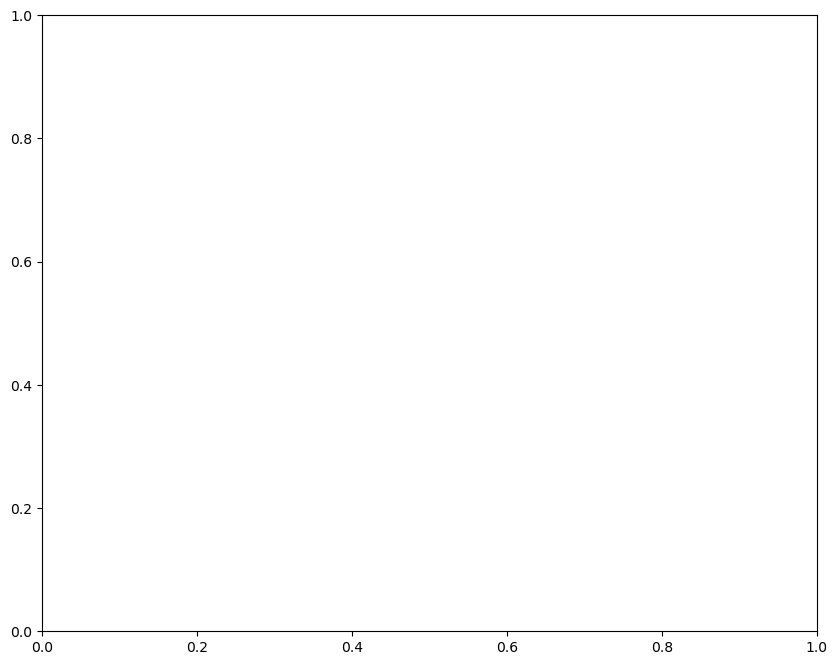

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

print("On val data...")
for k in range(n_val_data):
    dat = val_data_points[k]
    par = [dat["ombh2"], dat["omch2"], dat["H0"], 0.06, 1, 3]
    unlensed_undamped = dat["cls_lensed"]/best.compute(par)
    
    if unlensed_undamped[-1] > 700:
        params_causing_spike.append([par[0], par[1], par[2]])
        
    ax.loglog(ells, unlensed_undamped)
    
    #ax.legend()
    
horizontal_loss = np.array(4998*[400])
horizontal_loss[0:500] = 0
ax.loglog(ells, horizontal_loss, color="r") # red line to show loss function value

ax.vlines(4500, 1, 50000, color = "r") # cutoff point... for l > cutoff the loss is calculated against the fixed value above, 50
ax.set_xlabel("$\ell$", fontsize=15)
ax.set_ylabel("", fontsize=15)
#ax.set_xlim(1000, 5000)
ax.set_ylim(10e-2,10e4)
ax.set_ylabel("$C_\ell^{TT}$", fontsize=15)

on all data...


Text(0, 0.5, '$C_\\ell^{TT}$')

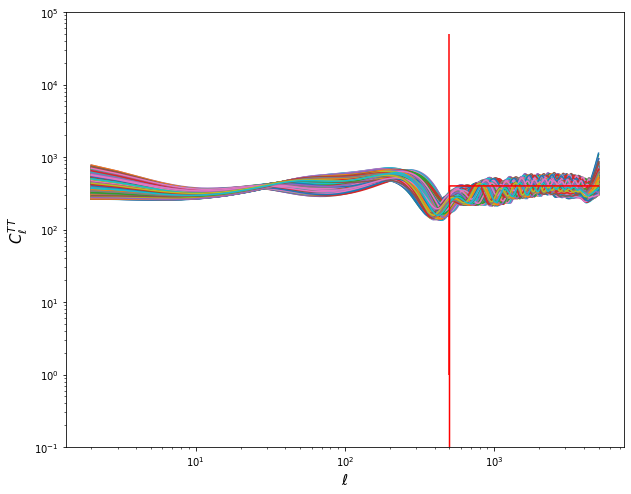

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
print("on all data...")

for k in range(n_data):
    dat = tot_data_points[k]
    par = [dat["ombh2"], dat["omch2"], dat["H0"], 0.06, 1, 3]
    
    unlensed_undamped = dat["cls_lensed"]/best.compute(par)
        
    ax.loglog(ells, unlensed_undamped)
    
    #ax.legend()
    
horizontal_loss = np.array(4998*[400])
horizontal_loss[0:500] = 0
ax.loglog(ells, horizontal_loss, color="r") # red line to show loss function value

ax.vlines(500, 1, 50000, color = "r") # cutoff point... for l > cutoff the loss is calculated against the fixed value above, 50
ax.set_xlabel("$\ell$", fontsize=15)
ax.set_ylabel("", fontsize=15)
#ax.set_xlim(1000, 5000)
ax.set_ylim(10e-2,10e4)
ax.set_ylabel("$C_\ell^{TT}$", fontsize=15)

(25.0, 114.0)

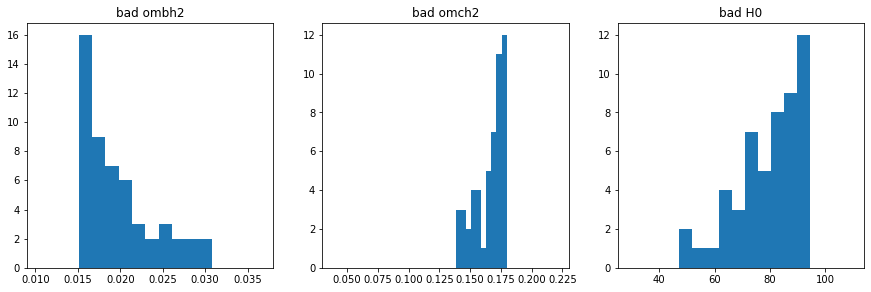

In [8]:
params_causing_spike = np.array(params_causing_spike)
fig, ax = plt.subplots(1,3, figsize=(15,4.5))
ax[0].hist(params_causing_spike[:, 0], bins = 10)
ax[0].set_title("bad ombh2")
ax[0].set_xlim(0.009, 0.038)
ax[1].hist(params_causing_spike[:, 1], bins = 10)
ax[1].set_title("bad omch2")
ax[1].set_xlim(0.03, 0.23)
ax[2].hist(params_causing_spike[:, 2], bins = 10)
ax[2].set_title("bad H0")
ax[2].set_xlim(25, 114)

In [9]:
best.genes

[0.0821673047,
 0.0353369396,
 5.04257456,
 0.468070264,
 1291.82108,
 0.4601042,
 1.30029558,
 -0.108872601,
 1.2773757,
 0.0216524787,
 0.0594868561,
 0.172557661,
 0.00373911112,
 0.552695616,
 -0.275902847,
 -0.213323894,
 -0.0312600935,
 16.342232,
 -0.00188705665,
 0.0513091978,
 1209.24328,
 -0.227283588]

In [10]:
# BEST-->>>> [ 4.45494962e-02,  9.92688526e-02,  1.62746999e+01,  4.53133654e-01, 1.20624809e+03,  5.40492643e-01,  1.86819618e-01,  8.47623143e-01, 1.53448389e+00,  1.22221556e-01,  1.00268977e-02,  9.31421132e-02, 1.17276709e-01, -3.05235699e-02,  3.29879050e+00,  4.09609621e-02, -5.92430773e-01,  7.70338361e-02,  5.64396553e-01,  1.38024169e+00, 1.41716096e+03, -6.95327175e+00]

In [11]:
# [2.53996139e-02,  1.06858394e-01,  2.15586829e+01,  4.12182991e-01, -4.62444492e+02, -1.96071827e-03, -1.52068985e+01, -2.85951428e-01, 1.23873843e+00,  5.59428848e-02,  2.85260069e-02, -5.84709194e-02, -1.16319078e-01,  2.17574784e-01, -1.89095882e+00,  1.87550750e-01, 1.11475579e-01,  6.46549102e-02, -6.81928867e-02,  1.01894837e+00, 1.44933988e+03, -2.00353225e+00]